In [1]:
import numpy as np
import pandas as pd
import scanpy as sc


from sklearn.metrics.pairwise import cosine_similarity

from numpy import linalg as LA


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#For editable text. Except latex text is still shapes sadly
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_style("whitegrid")
font = {'size' : 6}
lines = {'linewidth' : 0.5}
fig = {'figsize' : (2.5, 1.5)}
mpl.rc('font', **font)
mpl.rc('lines', **lines)
mpl.rc('figure', **fig)

#Set style
sns.set(style="whitegrid", palette="pastel", color_codes=True)


import os
from matplotlib_venn import venn2

In [2]:
def save_figure_pdf(fig, path_to_save):
	'''
	Utility fxn to save a figure without having to retype all the required options.
	Input:
		fig - a matplotlib.pyplot.figure instance with the figure you'd like to save
		path_to_save - the path you'd like to save the figure to
	Returns: Nothing but there should now be a pdf version in 300 dpi with a transparent bkg at path_to_save
	'''
	fig.savefig(path_to_save, dpi = 300, bbox_inches = 'tight', transparent = True)

In [3]:
figSavePath = ""
figEnd = "_12012021.pdf"

In [4]:
coefs = pd.read_csv("gtex_sigMat18.0_cpmThresh1_allCoefs_11222021.csv", sep = ",", index_col = 0)

In [5]:
# drop duplicates rows by index name in case sherlock had to start and restart a job
coefs = coefs[~coefs.index.duplicated(keep='first')]

In [6]:
nusvr = [i for i in coefs.index if "NUSVR" in i]

In [7]:
coefs.shape

(11008, 65)

In [8]:
nuCoefs = coefs.loc[nusvr]

In [9]:
nuCoefs.shape

(10320, 65)

In [10]:
rmseDat = pd.read_csv("gtex_sigMat18.0_cpmThresh1_allPreds_11222021.csv",
                     sep = ",", index_col = 0).T

In [11]:
rmseDat = rmseDat.loc[[i for i in rmseDat.index if 'normCoef' in i]]

In [12]:
samps = np.unique([i.split("-NUSVR")[0] for i in nuCoefs.index.tolist()])

bestRMSE = pd.DataFrame()

for i in samps:
    rmseThisSamp = rmseDat.loc[[j for j in rmseDat.index if i in j]]
    
    # get the sample with the best RMSE value
    bestNu = rmseThisSamp[rmseThisSamp[0] == rmseThisSamp[0].min()]
    
    
    # for one sample, two values of nu/C combinations give identical RMSE/r
    # just pick the first one
    
    
    bestRMSE = pd.concat([bestRMSE, bestNu], axis = 0)

bestRMSE.columns = ['rmse']

# add a column for subsetting with the GTEx data
bestRMSE['sampleID'] = [i.split("_rmse_normCoef")[0] for  i in bestRMSE.index]

In [13]:
bestSamp = nuCoefs.loc[bestRMSE['sampleID']]

In [14]:
# all coefficients less than 0 -> 0
bestSamp[bestSamp < 0] = 0

print(bestSamp.shape)

# just get the coefficients for the normalization
bestCoefs = bestSamp.iloc[:,:-3]
bestCoefs = bestCoefs.div(bestCoefs.sum(axis = 1), axis = 0)

# drop cell types that have zero fractional contribution across all samples
bestCoefs = bestCoefs.loc[:, (bestCoefs != 0).any(axis=0)]
rRMSEPVal = bestSamp.iloc[:,-3:]


# tack on the p value
bestCoefs = pd.concat([bestCoefs, rRMSEPVal], axis = 1)


# set the index to just be the gtex name
gtexID = [i.split("-NUSVR")[0] for i in bestCoefs.index]

bestCoefs.index = gtexID

(344, 65)


In [15]:
bestRMSE.shape

(344, 2)

In [16]:
refHex = ["006d77","83c5be",
          "555b6e","ffd6ba",
          "98c1d9","e0fbfc","ee6c4d","293241","ff006e",
          "8e9aaf","cbc0d3","efd3d7","feeafa","dee2ff",
          "ffbe0b","fb5607","ffddd2","e29578", "89b0ae","8338ec","3a86ff","bee3db"]

refHex = ["#" + i for i in refHex]
print(len(refHex))

22


In [17]:
sns.color_palette(refHex)

[(0.0, 0.42745098039215684, 0.4666666666666667),
 (0.5137254901960784, 0.7725490196078432, 0.7450980392156863),
 (0.3333333333333333, 0.3568627450980392, 0.43137254901960786),
 (1.0, 0.8392156862745098, 0.7294117647058823),
 (0.596078431372549, 0.7568627450980392, 0.8509803921568627),
 (0.8784313725490196, 0.984313725490196, 0.9882352941176471),
 (0.9333333333333333, 0.4235294117647059, 0.30196078431372547),
 (0.1607843137254902, 0.19607843137254902, 0.2549019607843137),
 (1.0, 0.0, 0.43137254901960786),
 (0.5568627450980392, 0.6039215686274509, 0.6862745098039216),
 (0.796078431372549, 0.7529411764705882, 0.8274509803921568),
 (0.9372549019607843, 0.8274509803921568, 0.8431372549019608),
 (0.996078431372549, 0.9176470588235294, 0.9803921568627451),
 (0.8705882352941177, 0.8862745098039215, 1.0),
 (1.0, 0.7450980392156863, 0.043137254901960784),
 (0.984313725490196, 0.33725490196078434, 0.027450980392156862),
 (1.0, 0.8666666666666667, 0.8235294117647058),
 (0.8862745098039215, 0.5843137254901961, 0.47058823529411764),
 (0.5372549019607843, 0.6901960784313725, 0.6823529411764706),
 (0.5137254901960784, 0.2196078431372549, 0.9254901960784314),
 (0.22745098039215686, 0.5254901960784314, 1.0),
 (0.7450980392156863, 0.8901960784313725, 0.8588235294117647)]

In [18]:
adataMeta = pd.read_csv("~/Documents/deconvolution/revision1/noGROUPING_07132021/cleanTSP_obsDF.csv",
sep = ",", index_col = 0)

cellToCompartment = {}
for cell in np.unique(adataMeta["cell_ontology_class"].tolist()):
    comp = np.unique(adataMeta[adataMeta["cell_ontology_class"] == cell]["compartment"]).tolist()[0]
    cellToCompartment[cell] = comp
    
# get the labels that need to be added
missingKeys = np.setdiff1d(bestCoefs.columns, list(cellToCompartment.keys()))

for k in missingKeys:
    if k == "Tissue" or k == "p-val" or k == "r" or k == "rmse": continue
    cellInKey = k.split("/")
    consensus = []
    for c in cellInKey:
        consensus += [cellToCompartment[c]]
        
    compThisKey = np.unique(consensus).tolist()
    if len(compThisKey) == 1: # eg they're all the same compartment
        cellToCompartment[k] = compThisKey[0]
    else:
        print(k)
        print(compThisKey)
        
cellToCompartment["club cell of prostate epithelium/hillock cell of prostate epithelium/hillock-club cell of prostate epithelium"] = "epithelial"
cellToCompartment["fibroblast/mesenchymal stem cell"] = "stromal"

/Users/kayaneh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2,4,8,9,11,13,14,15,25,26,27,29,30,31,32,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


club cell of prostate epithelium/hillock cell of prostate epithelium/hillock-club cell of prostate epithelium
['epithelial', 'nan']
fibroblast/mesenchymal stem cell
['immune', 'stromal']


In [19]:
compartment = []
for i in bestCoefs.iloc[:,:-3].columns:
    compartment += [cellToCompartment[i]]

In [20]:
bestCoefs.columns

Index(['adventitial cell', 'cardiac muscle cell', 'cell of skeletal muscle',
       'fibroblast/mesenchymal stem cell', 'melanocyte', 'mesothelial cell',
       'pancreatic stellate cell', 'pericyte cell', 'schwann cell',
       'smooth muscle cell', 'stromal cell', 'tendon cell',
       'acinar cell of salivary gland/myoepithelial cell', 'basal cell',
       'basal cell of prostate epithelium', 'bladder urothelial cell',
       'ciliated cell/lung ciliated cell',
       'ciliated epithelial cell/epithelial cell of uterus',
       'club cell/type i pneumocyte',
       'club cell of prostate epithelium/hillock cell of prostate epithelium/hillock-club cell of prostate epithelium',
       'duct epithelial cell/serous cell of epithelium of bronchus',
       'duodenum glandular cell',
       'enterocyte of epithelium of large intestine/enterocyte of epithelium of small intestine/intestinal crypt stem cell of large intestine/large intestine goblet cell/mature enterocyte/paneth cell of epithe

In [21]:
bestCoefs.iloc[:,:-3].columns.shape

(62,)

In [22]:
bestCoefs.shape

(344, 65)

In [23]:
def stackBarTiss(sampNames, sampleType):
    inGtex = np.intersect1d(bestCoefs.index, sampNames)

    relCoefs = bestCoefs.loc[inGtex]
    

    relCoefs = relCoefs.loc[:, (relCoefs != 0).any(axis=0)].iloc[:,:-4]
    
    top20Cells = relCoefs.mean(axis = 0).sort_values(ascending = False).head(20).index.tolist()
    

    top20DF = relCoefs[top20Cells]
    print("top20DF shape ", top20DF.shape)
    #print(len(top20DF.index))
    print(len(gtexinfo.loc[inGtex]["SMPTHNTS"].values.tolist()))
    top20DF.index = gtexinfo.loc[inGtex]["SMPTHNTS"].values.tolist()
    cell_pal = {}
    for i, cell in enumerate(top20DF.columns):

        cell_pal[cell] = refHex[i]
        

    top20DF.plot.bar(stacked = True, color = cell_pal, figsize = (20, 10))
    
    plt.title(sampleType)
    plt.ylabel("Fraction Cell Type Specific RNA")
    
    
    plt.legend(bbox_to_anchor=(.2, -1.2), 
           
           loc=2, borderaxespad=0., ncol = 4)
   
    
    
    # then do per compartment
    
    #save_figure_pdf(plt, sampleType + "_deconvGTEX_sigmat18_NOZERO" + figEnd)
    plt.show()

In [24]:
gtexinfo = pd.read_csv("gtexinfo.csv", sep = ",", index_col = 0)

wholeblood = gtexinfo[gtexinfo["SMTSD"] == "Whole Blood"].index.tolist()
kidney = gtexinfo[gtexinfo["SMTSD"].isin(['Kidney - Cortex', 'Kidney - Medulla'])].index.tolist()
kidneyCortex =  gtexinfo[gtexinfo["SMTSD"].isin(['Kidney - Cortex'])].index.tolist()
kidneyMedulla =  gtexinfo[gtexinfo["SMTSD"].isin(['Kidney - Medulla'])].index.tolist()
liver = gtexinfo[gtexinfo["SMTSD"] == "Liver"].index.tolist()
lung = gtexinfo[gtexinfo["SMTSD"] == "Lung"].index.tolist()
smallintestine = gtexinfo[gtexinfo["SMTSD"] == "Small Intestine - Terminal Ileum"].index.tolist()
spleen = gtexinfo[gtexinfo["SMTSD"] == "Spleen"].index.tolist()

brain = gtexinfo[gtexinfo["SMTSD"] == "Brain - Amygdala"].index.tolist()
breast = gtexinfo[gtexinfo["SMTSD"] == "Breast - Mammary Tissue"].index.tolist()
colon = gtexinfo[gtexinfo["SMTSD"] == "Colon - Transverse"].index.tolist()
muscle = gtexinfo[gtexinfo["SMTSD"] == 'Muscle - Skeletal'].index.tolist()
uterus = gtexinfo[gtexinfo["SMTSD"] == 'Uterus'].index.tolist()
bladder = gtexinfo[gtexinfo["SMTSD"] == 'Bladder'].index.tolist()

In [25]:
len(np.unique(gtexinfo['SMTSD']))

13

top20DF shape  (30, 20)
30


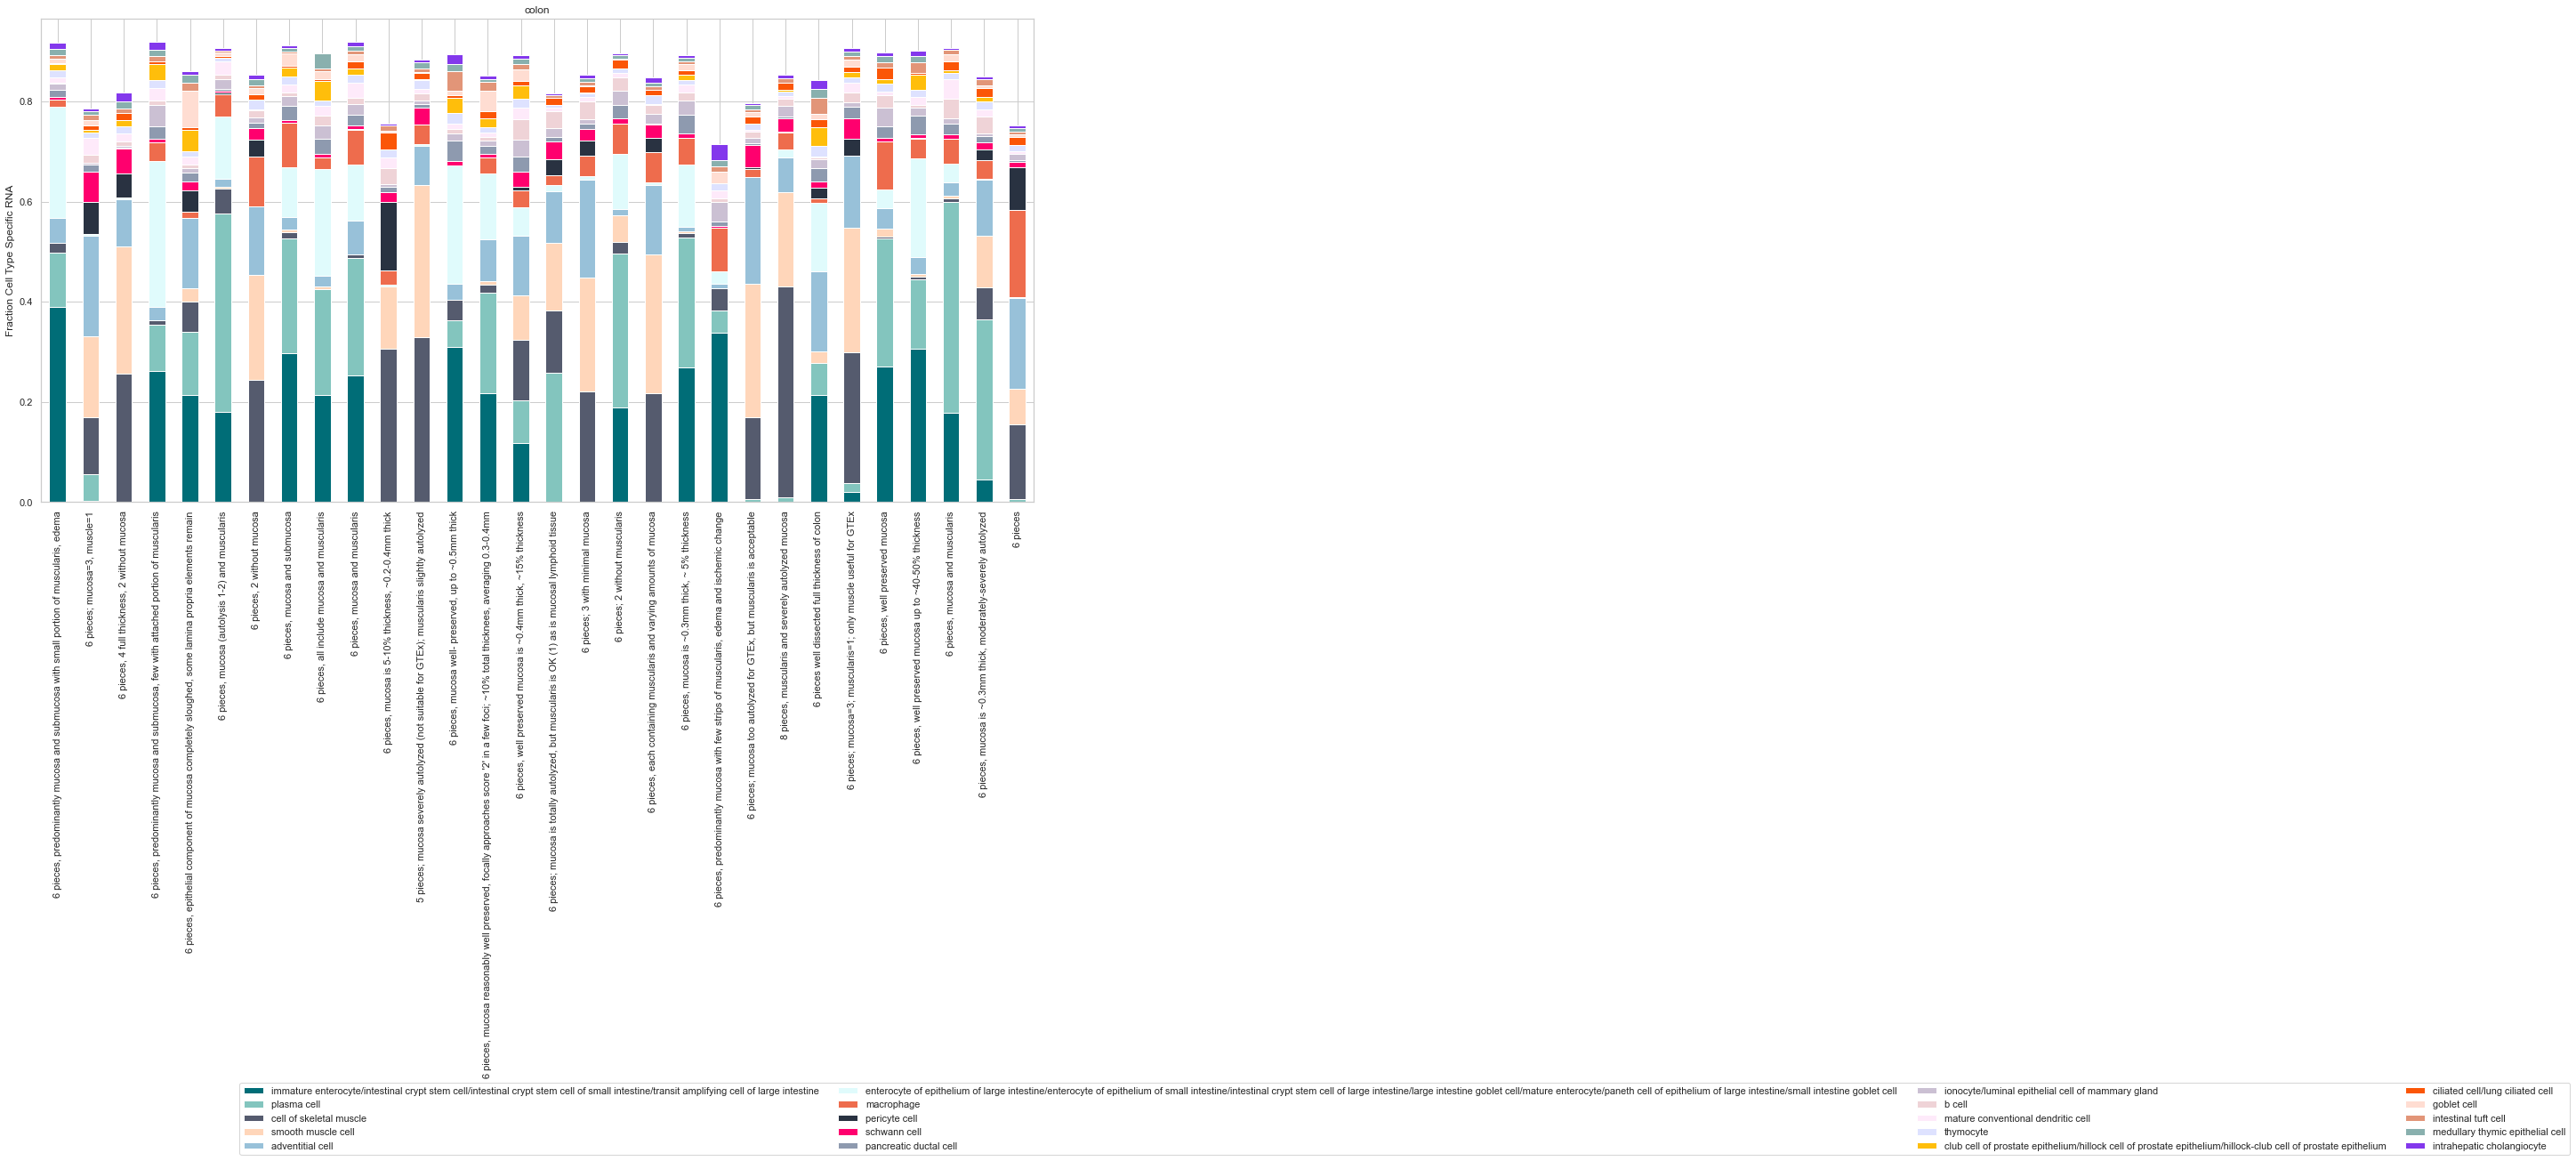

In [26]:
stackBarTiss(colon, "colon")

top20DF shape  (30, 20)
30


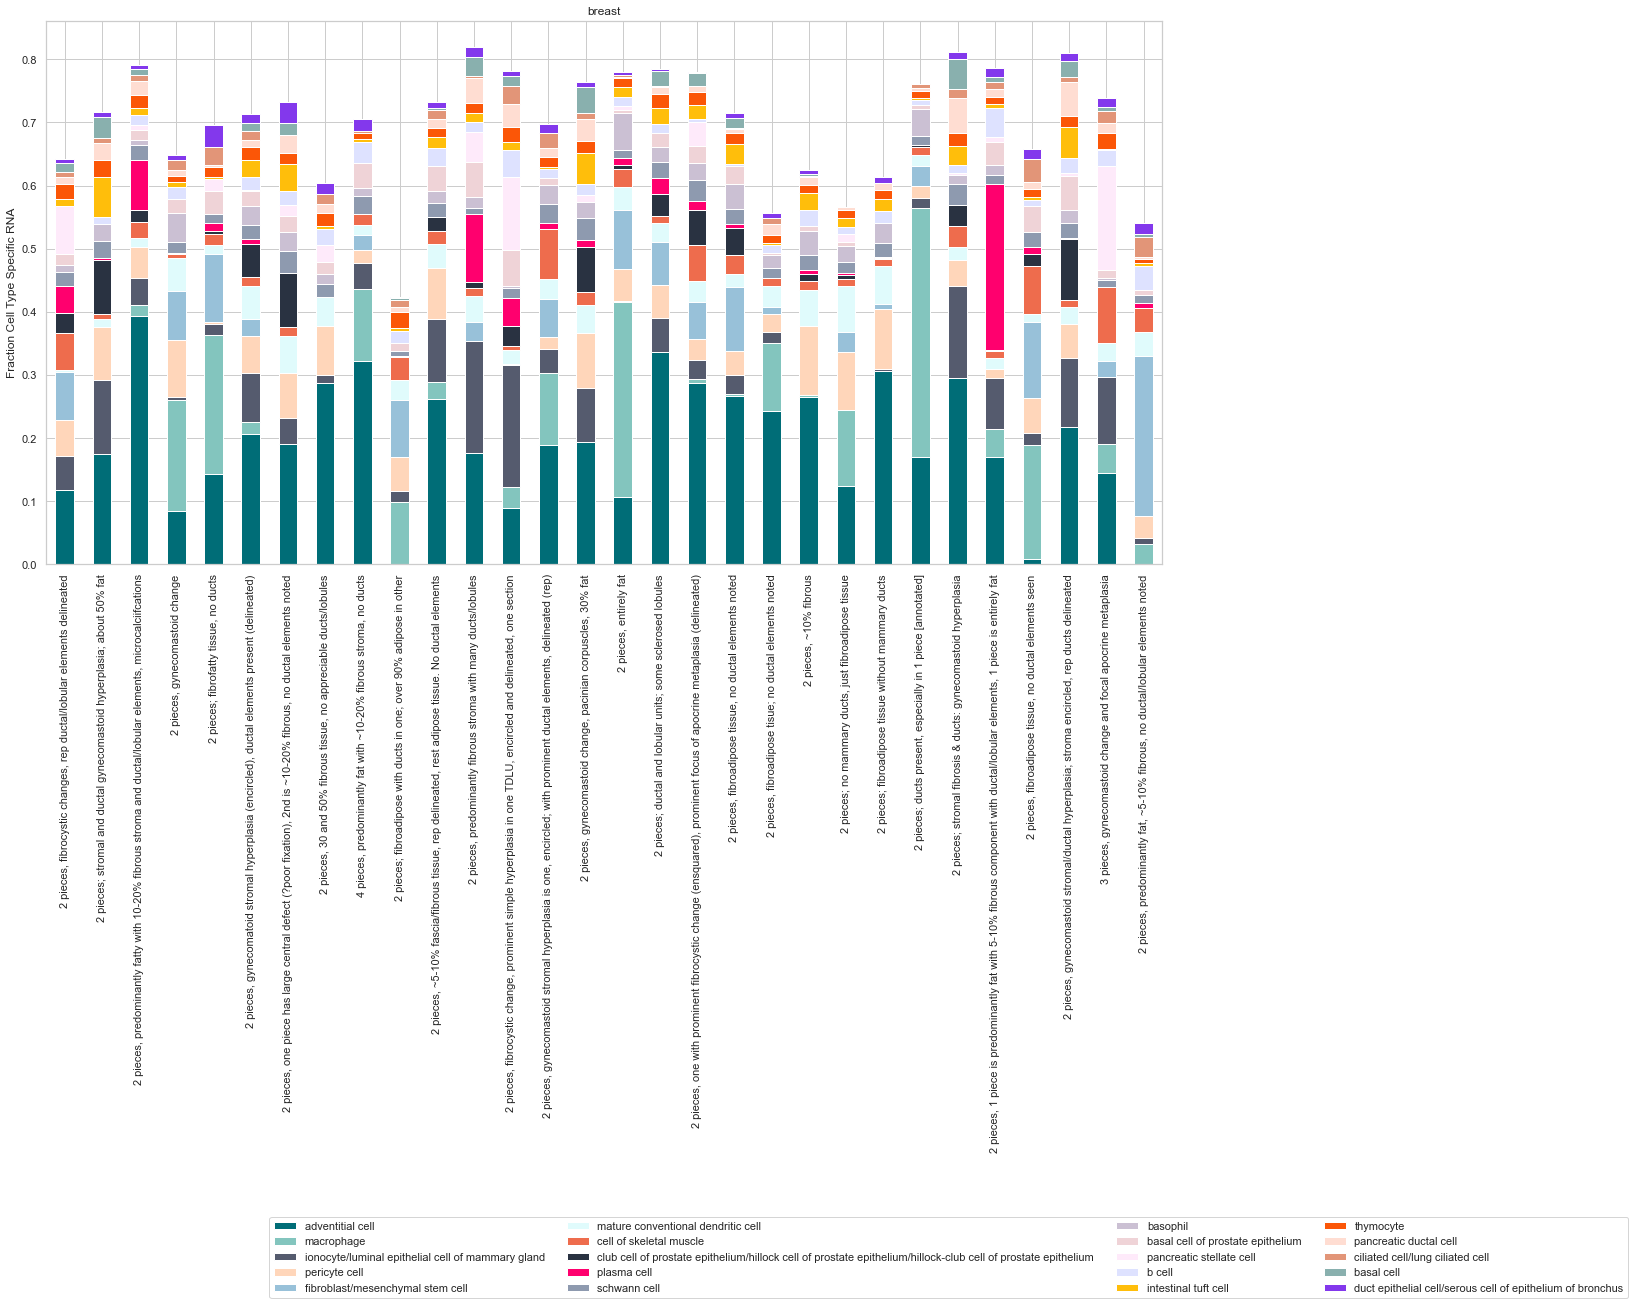

In [27]:
stackBarTiss(breast, "breast")

In [28]:
def compartmentFracs(sampNames, sampleType):
    inGtex = np.intersect1d(bestCoefs.index, sampNames)
    relCoefs = bestCoefs.iloc[:, :-3].loc[inGtex]
    
    relCoefs.columns = compartment
    
    allComp = np.unique(compartment)
    
    # iterate through the compartments and get the sum of cell type contributions belonging to a given compartment
    compDF = pd.DataFrame()
    for comp in allComp:
        cellsThisComp = relCoefs[comp]
        if len(cellsThisComp.shape) > 1: # eg there are observed cells in this compartment
            thisCompTotal = cellsThisComp.sum(axis = 1).to_frame()
            thisCompTotal.columns = [comp]
            compDF = pd.concat([compDF, thisCompTotal], axis = 1)
        else:
            
            cellsThisComp = cellsThisComp.to_frame()
            compDF = pd.concat([compDF, cellsThisComp])
    
    compartment_map = {'stromal': '#ffbe0b', 
                   "immune/stromal": '#1d3557',
                   'epithelial': '#fb5607', 
                   'immune': '#218380',
                   "endothelial":'#8338ec',
                  "germ line": "#ff006e"}
    compDF.plot.bar(stacked = True, color = compartment_map, figsize = (20, 10))
    
    plt.title(sampleType)
    plt.ylabel("Fraction Cell Type Specific RNA")
    
    
    #plt.legend(bbox_to_anchor=(.2, -1.2), 
           
    #       loc=2, borderaxespad=0., ncol = 4)
    plt.show()
    #return(relCoefs, compDF)

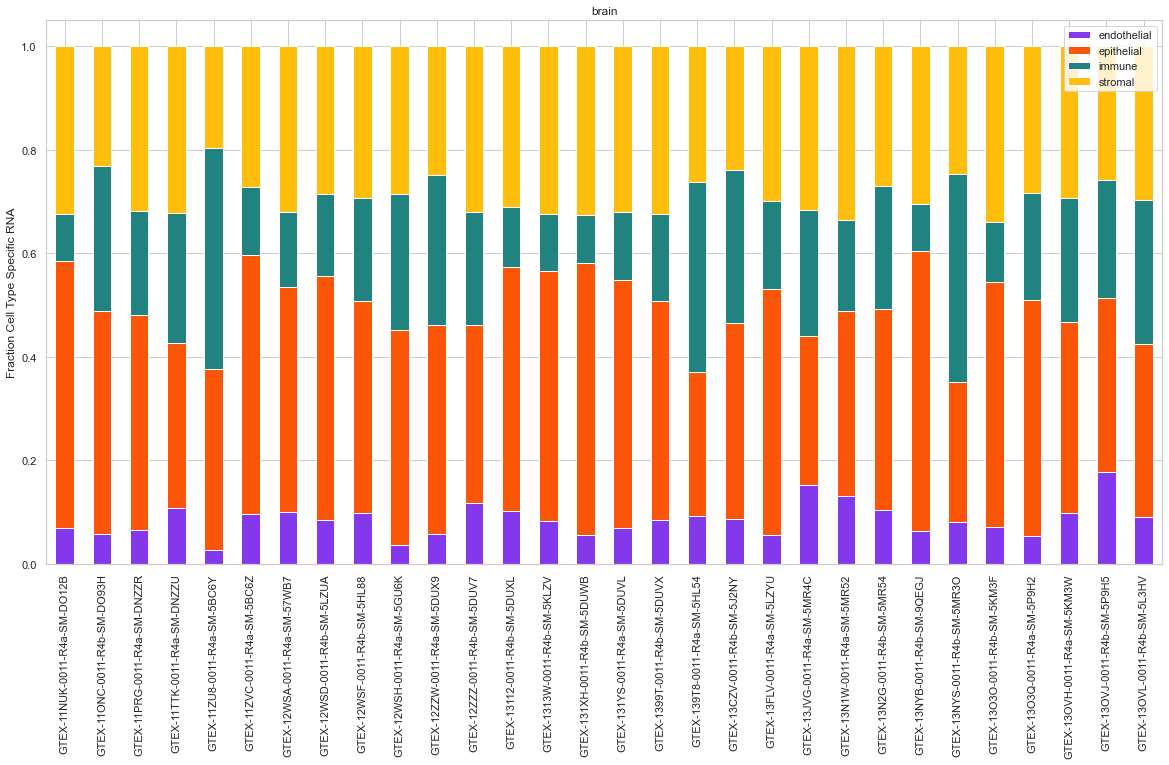

In [29]:
compartmentFracs(brain, "brain")

top20DF shape  (30, 20)
30


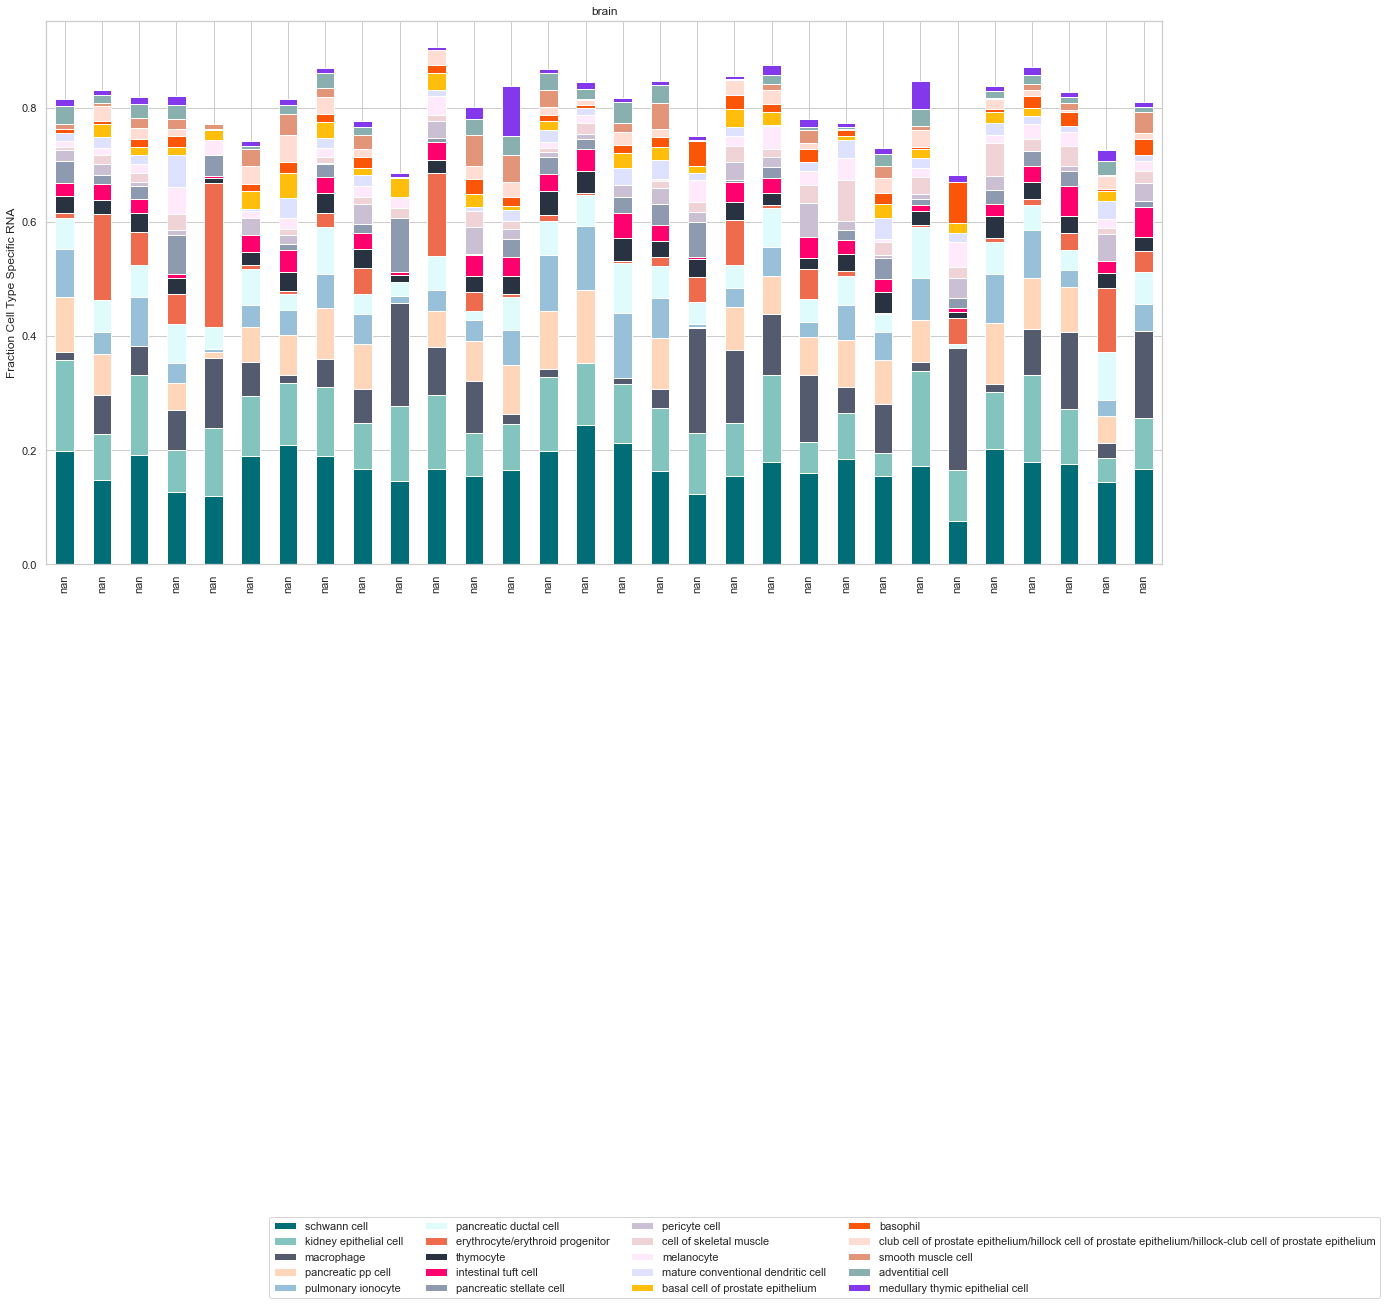

In [30]:
stackBarTiss(brain, "brain")
#compartmentFracs(brain, "brain")

top20DF shape  (21, 20)
21


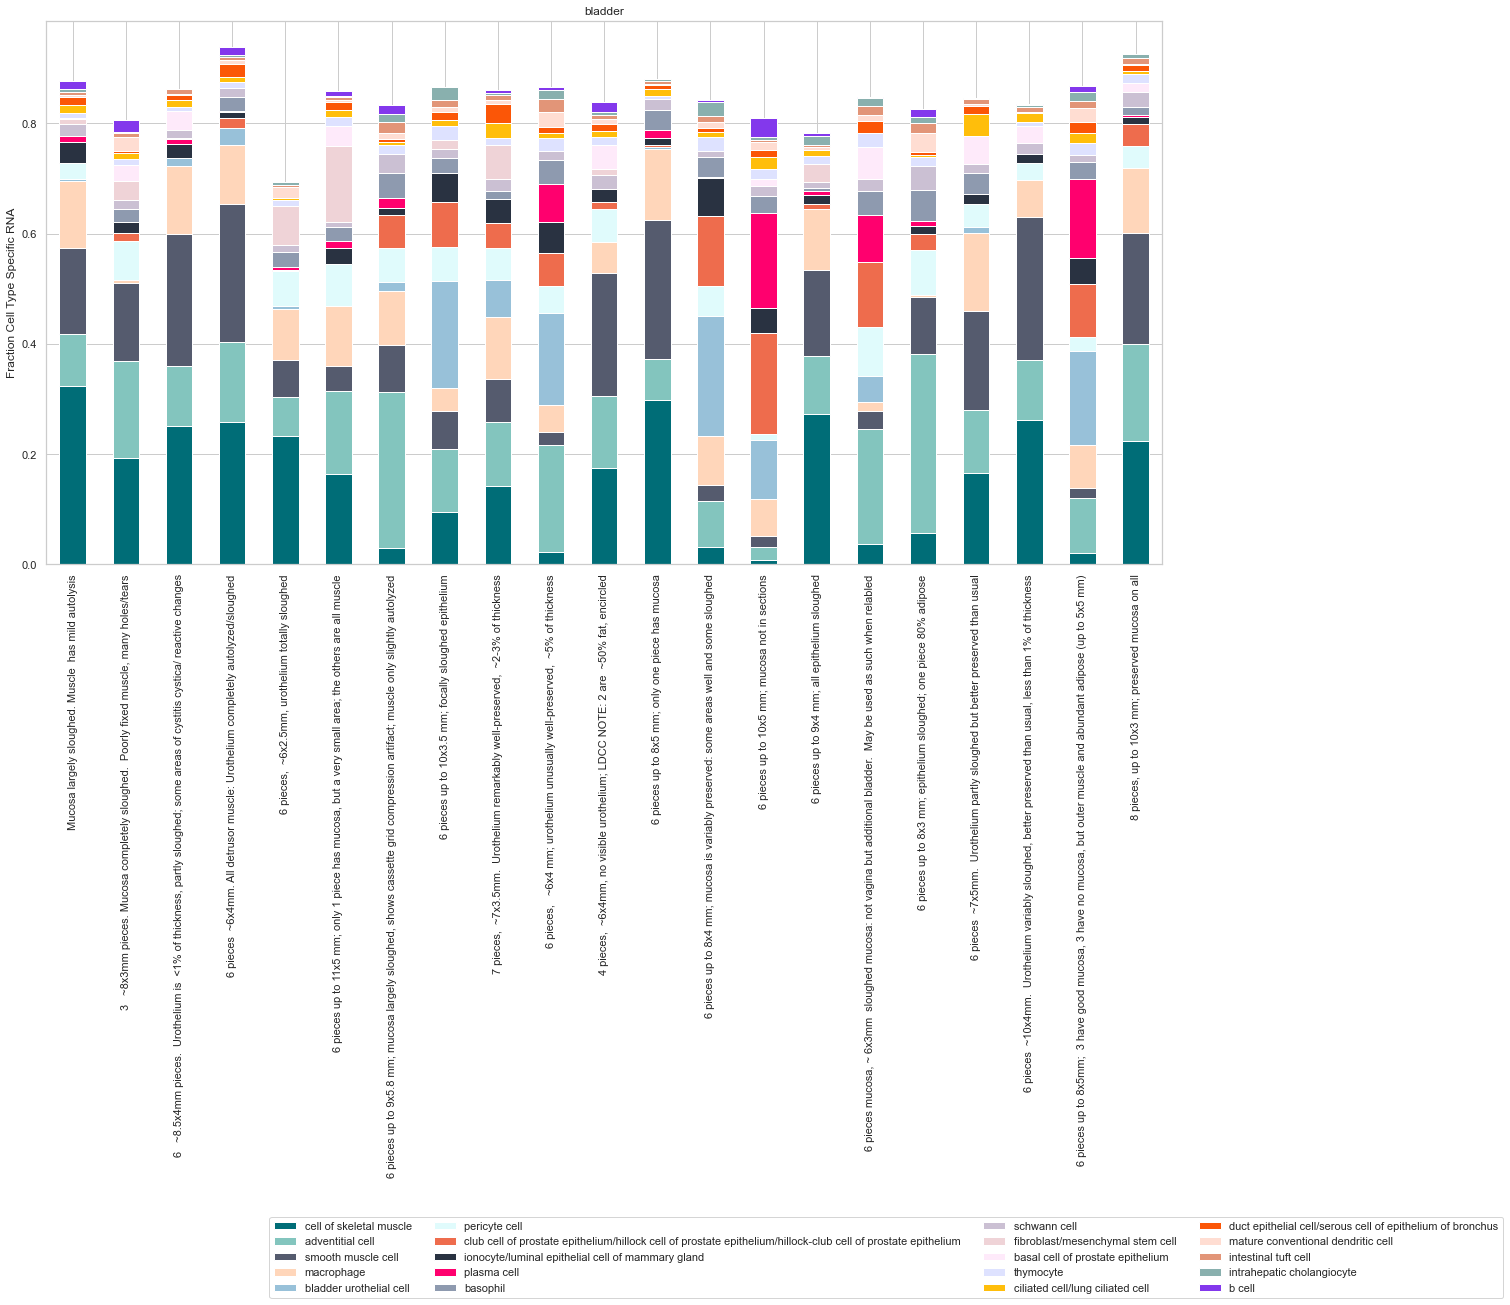

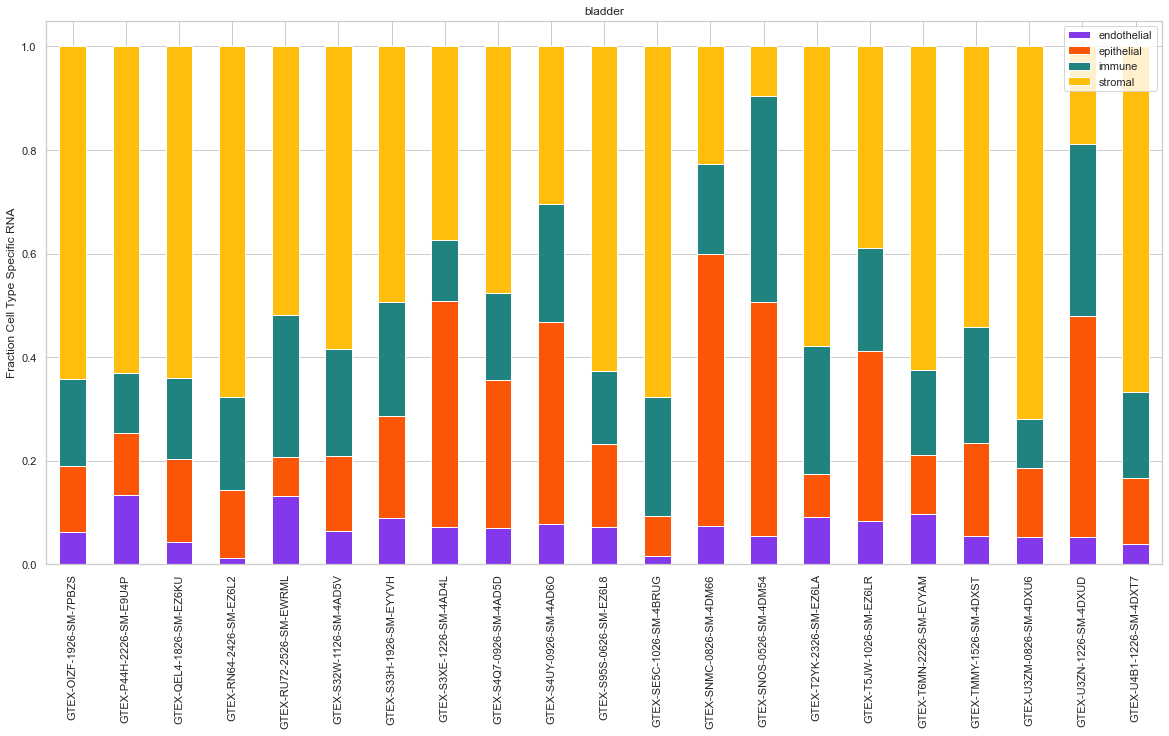

In [31]:
stackBarTiss(bladder, "bladder")
compartmentFracs(bladder, "bladder")

top20DF shape  (30, 20)
30


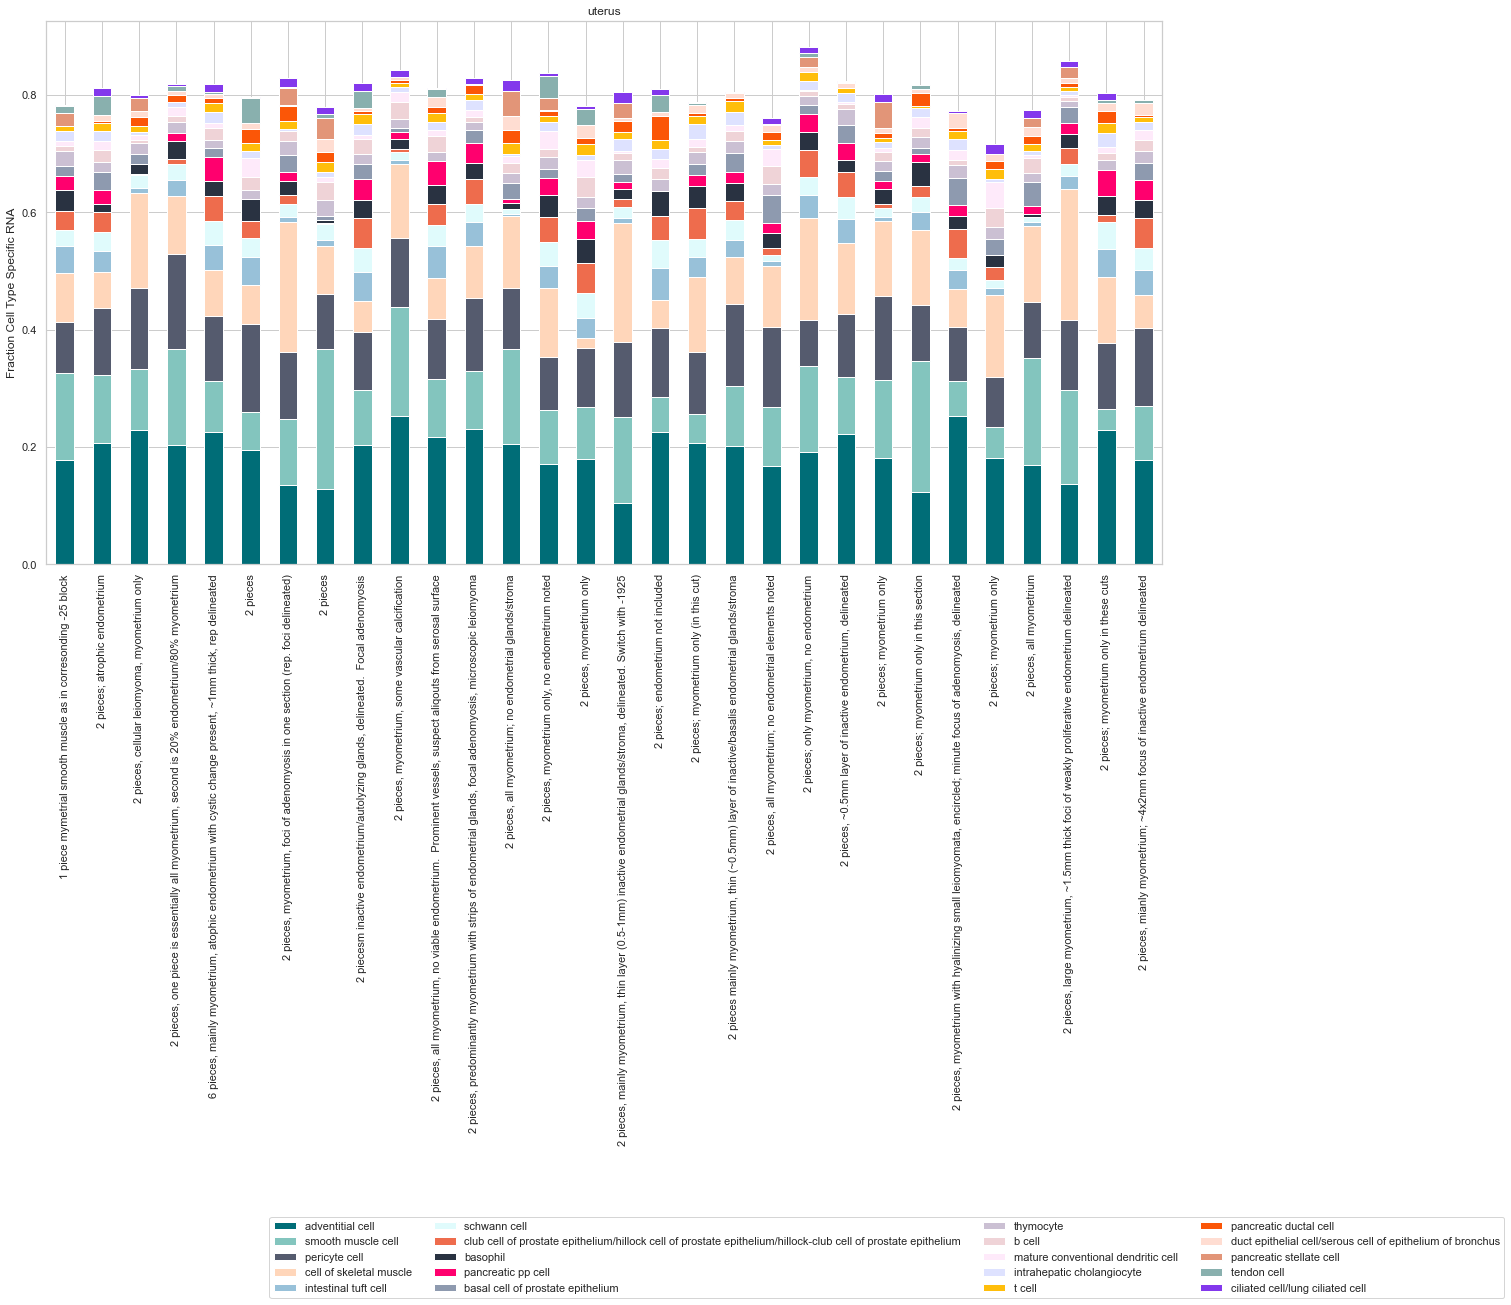

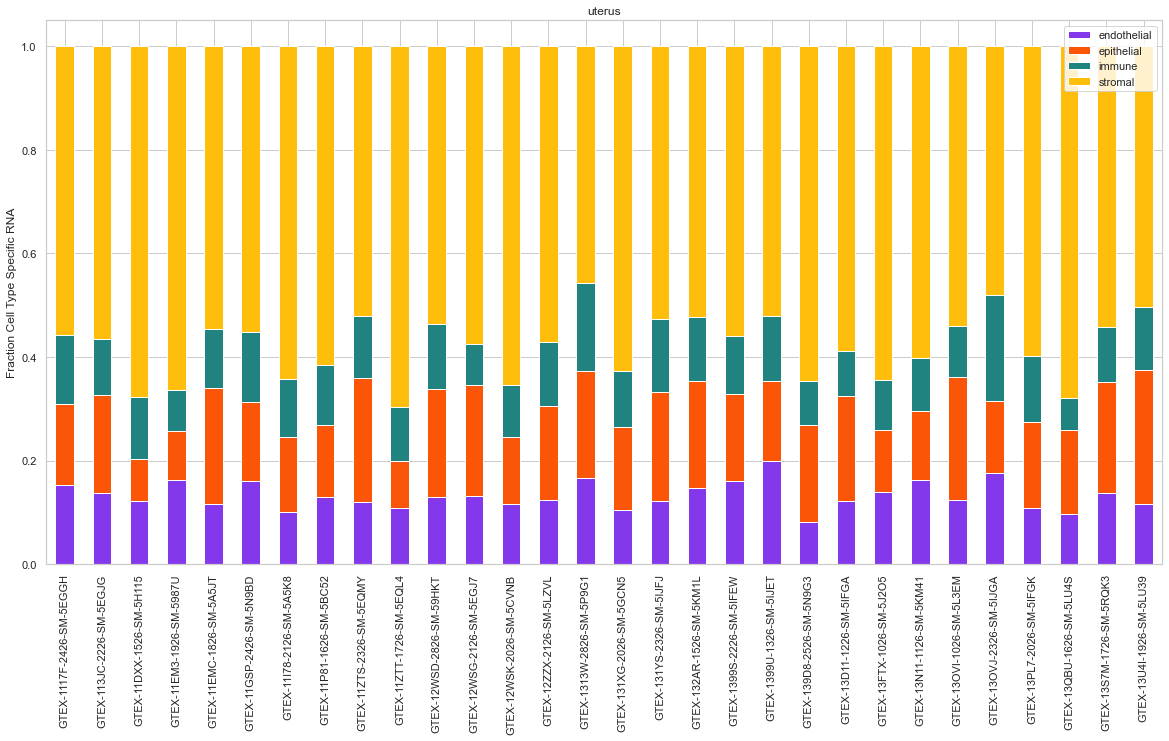

In [32]:
stackBarTiss(uterus, "uterus")
compartmentFracs(uterus, "uterus")

top20DF shape  (30, 20)
30


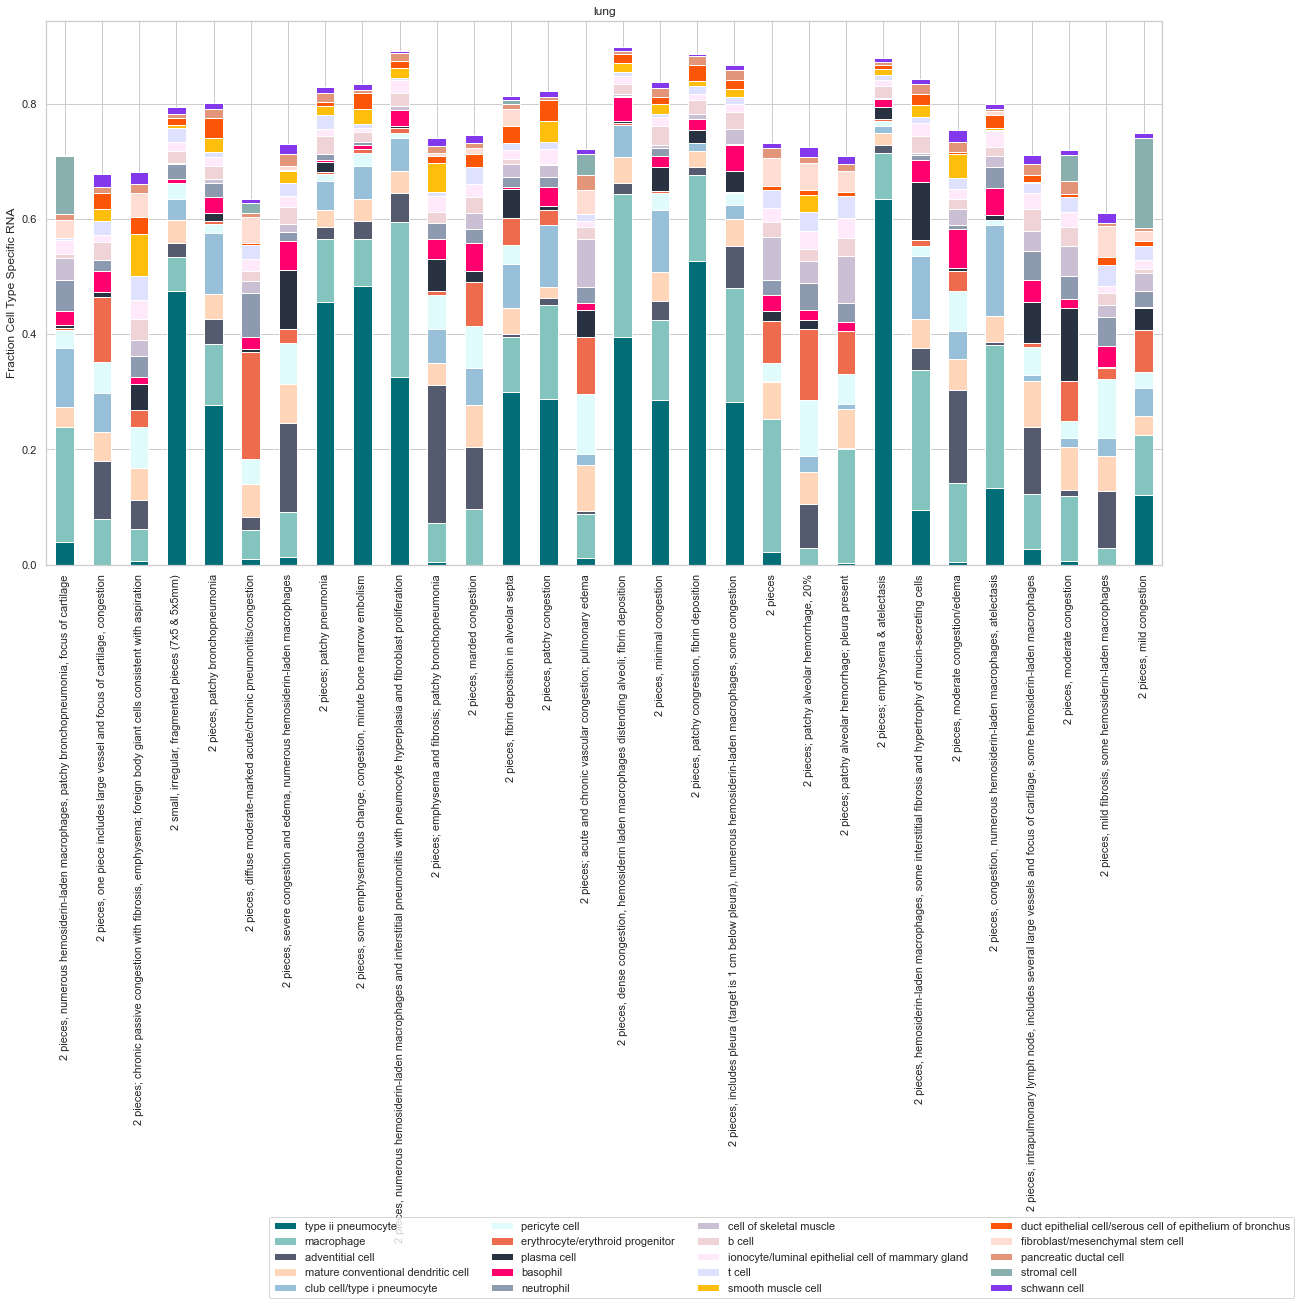

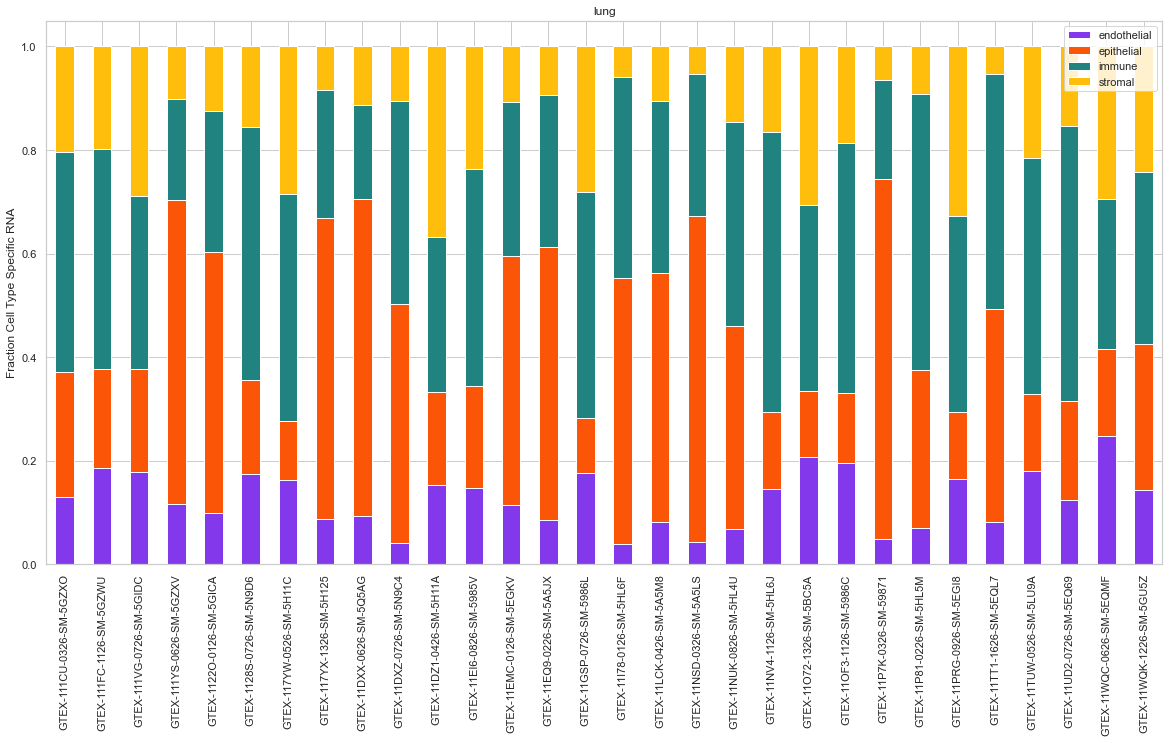

In [33]:
stackBarTiss(lung, "lung")
compartmentFracs(lung, "lung")

top20DF shape  (30, 20)
30


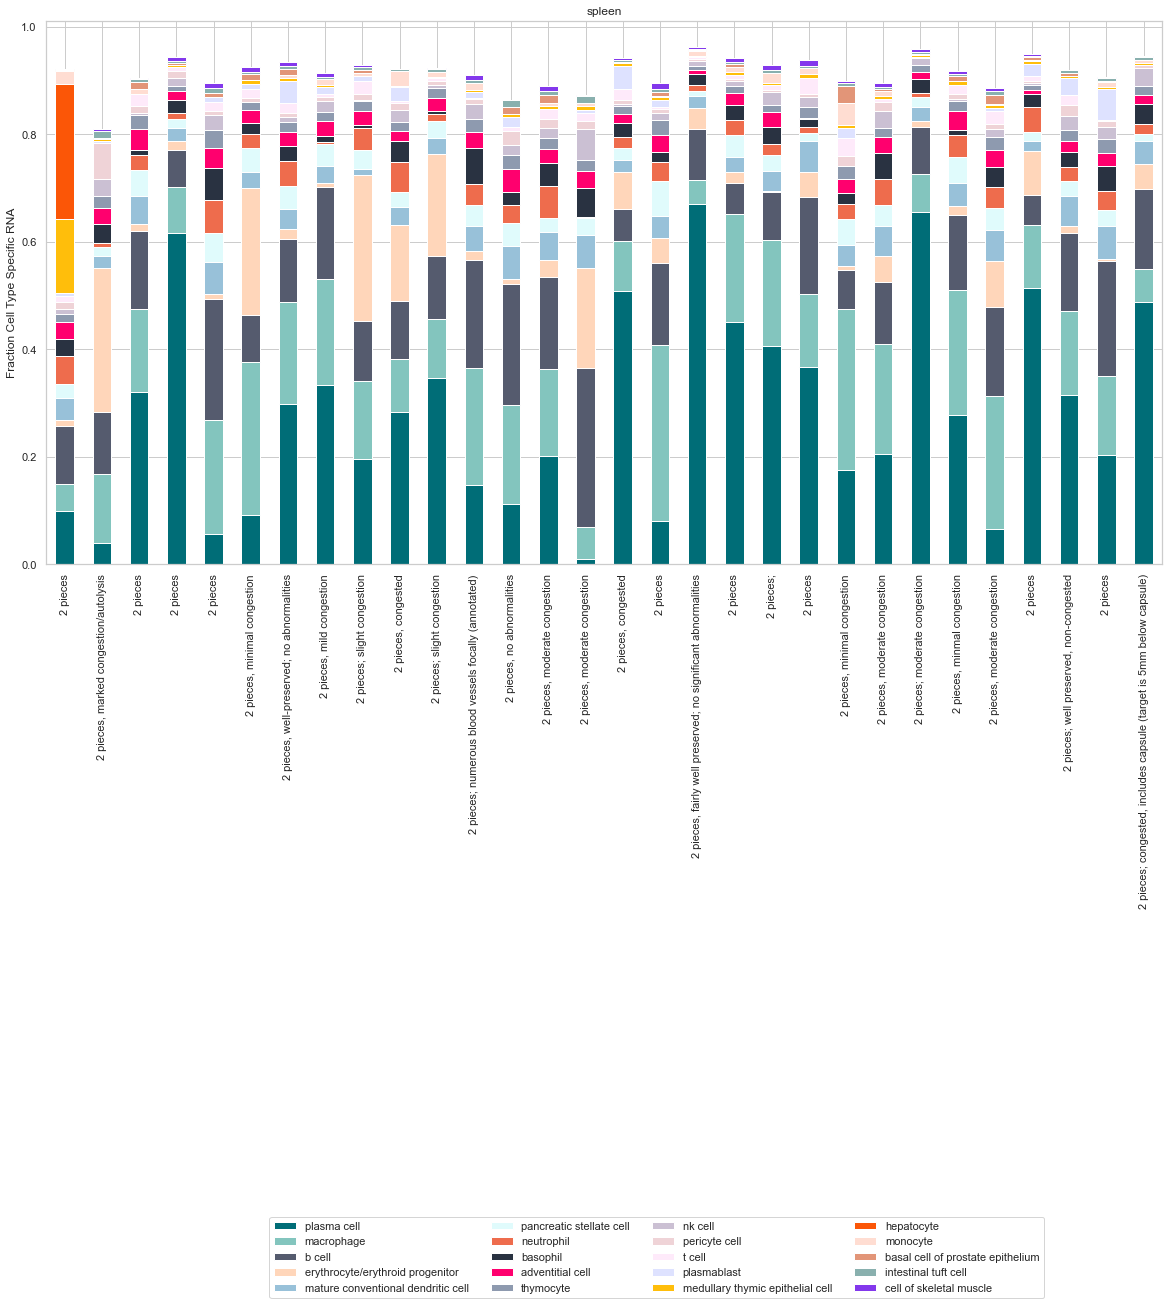

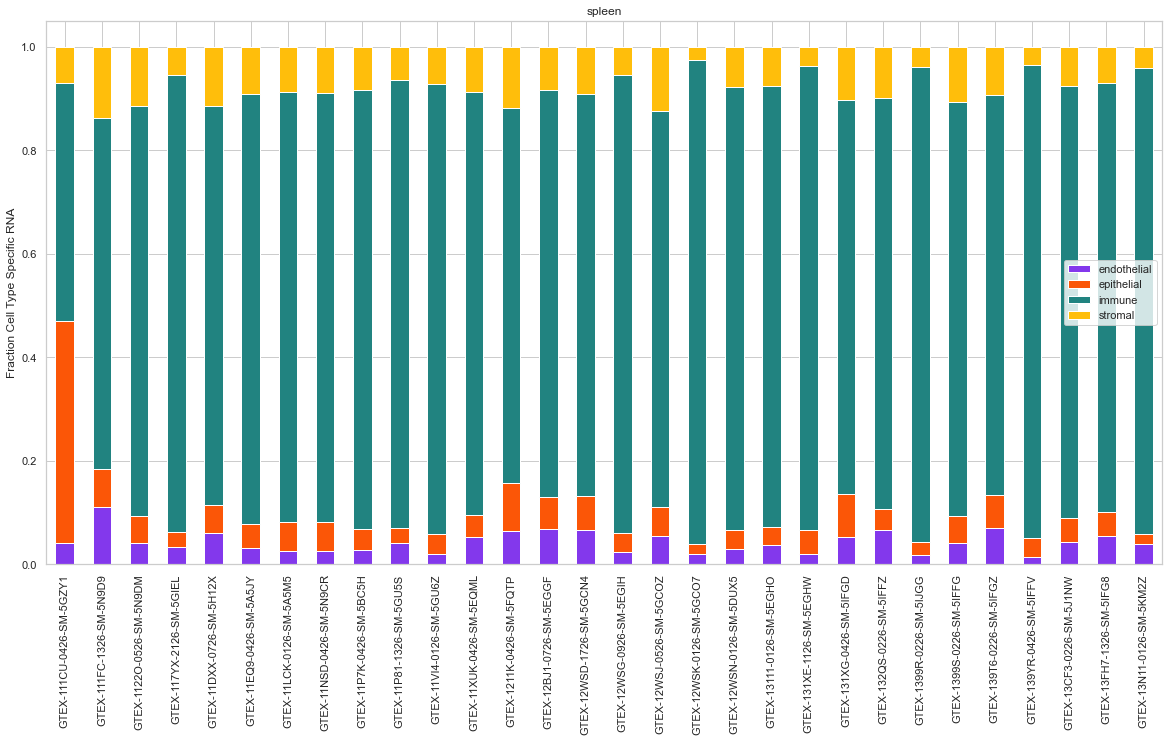

In [34]:
stackBarTiss(spleen, "spleen")
compartmentFracs(spleen, "spleen")

top20DF shape  (30, 20)
30


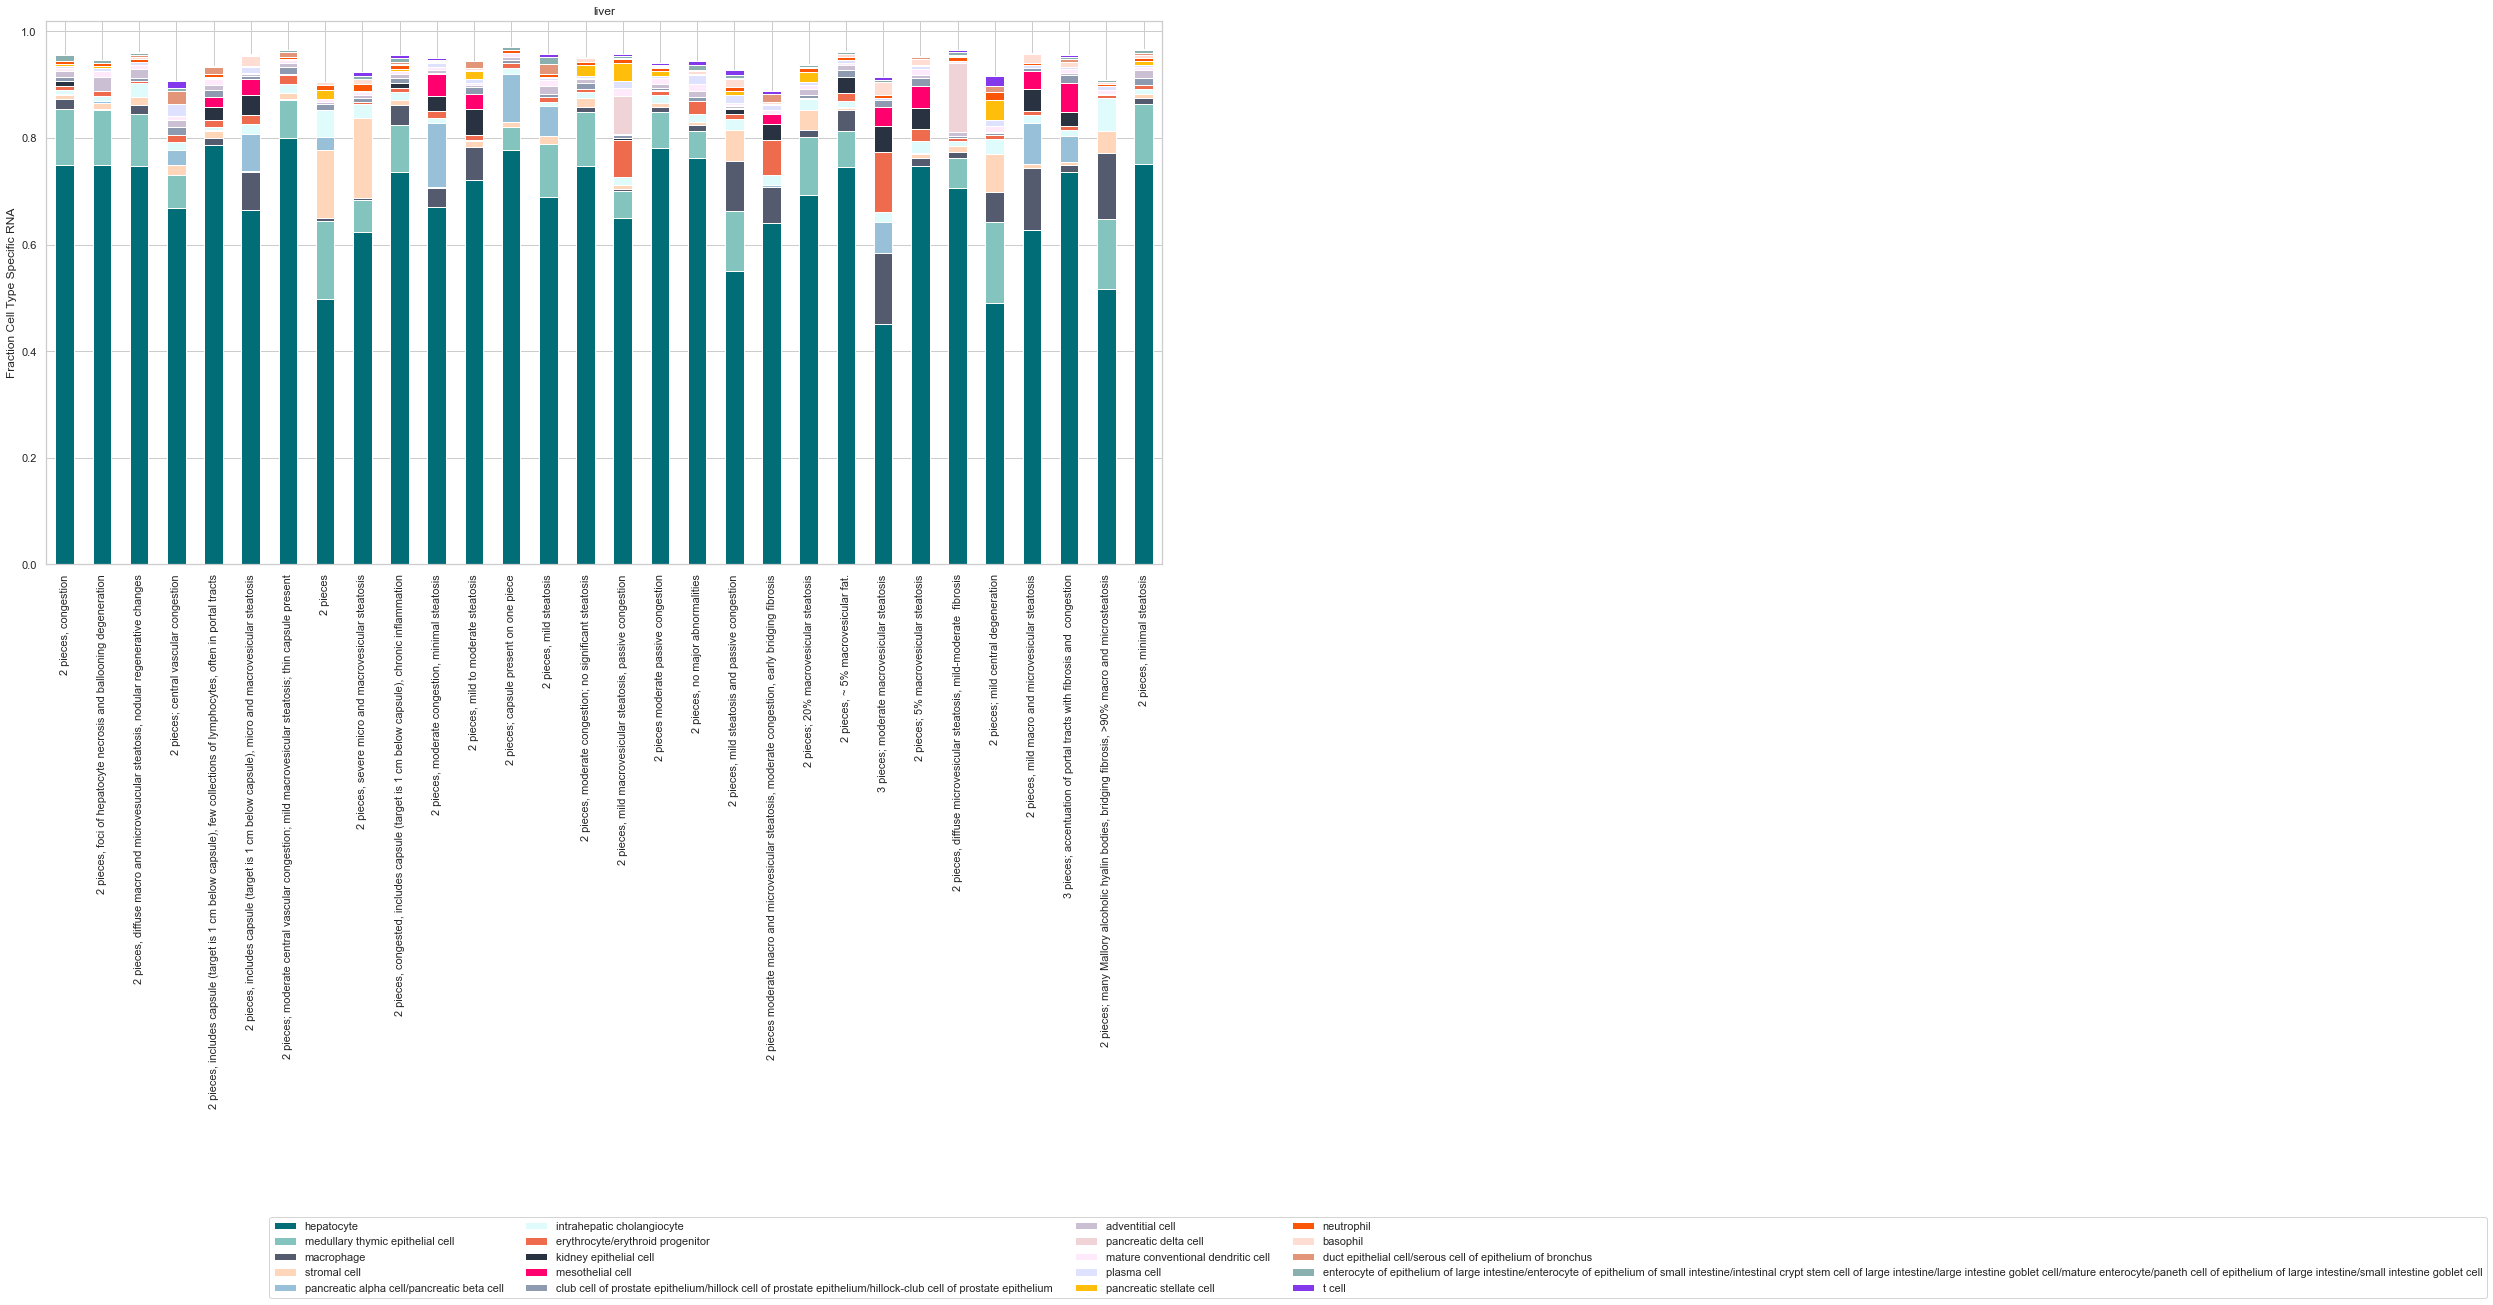

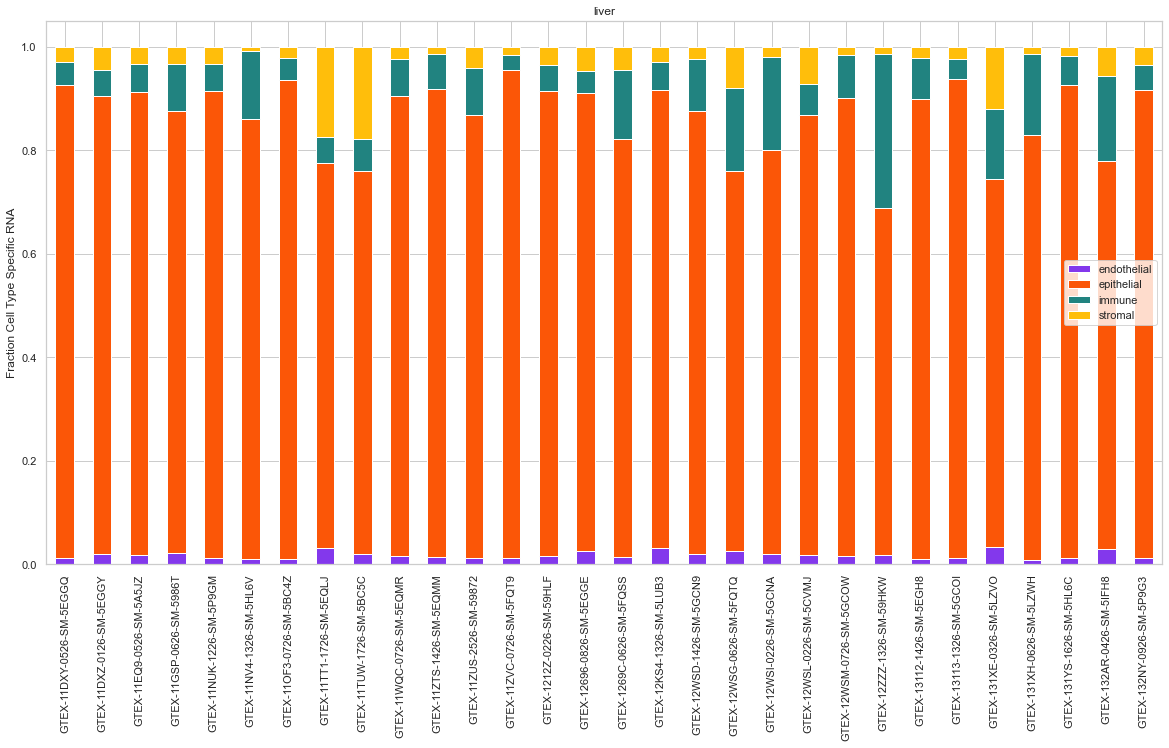

In [35]:
stackBarTiss(liver, "liver")
compartmentFracs(liver, "liver")

top20DF shape  (19, 20)
19


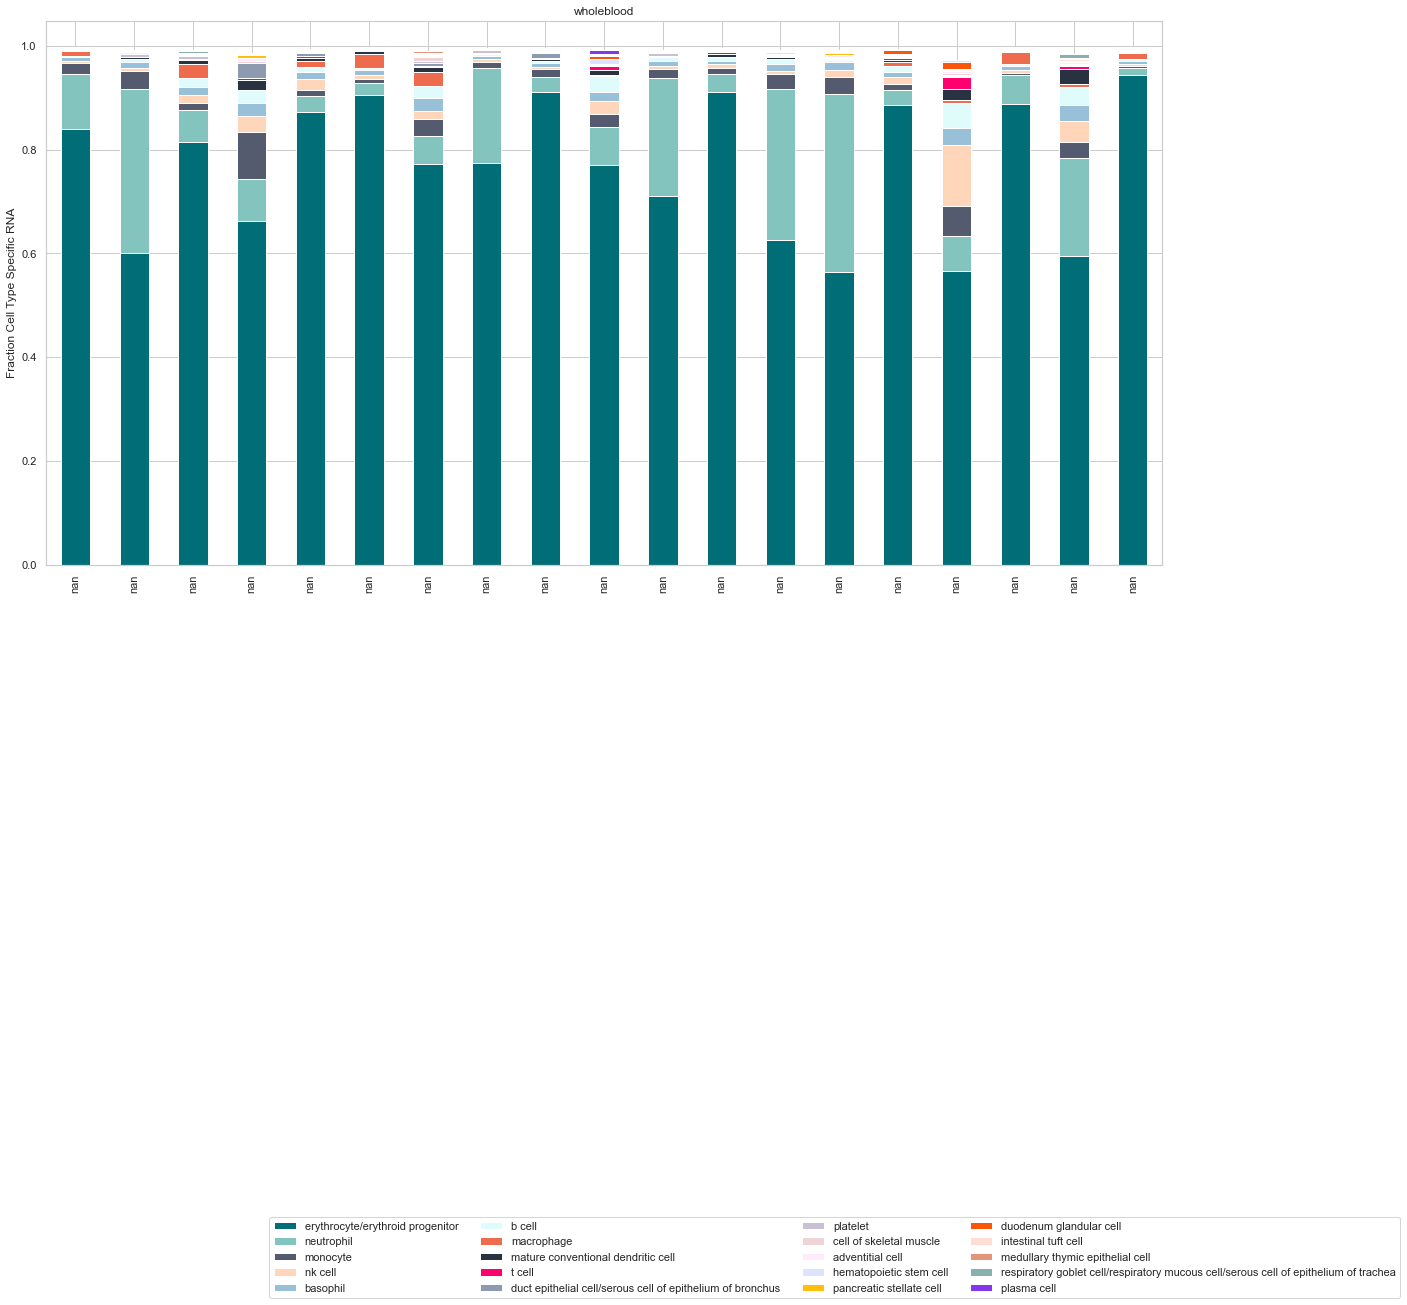

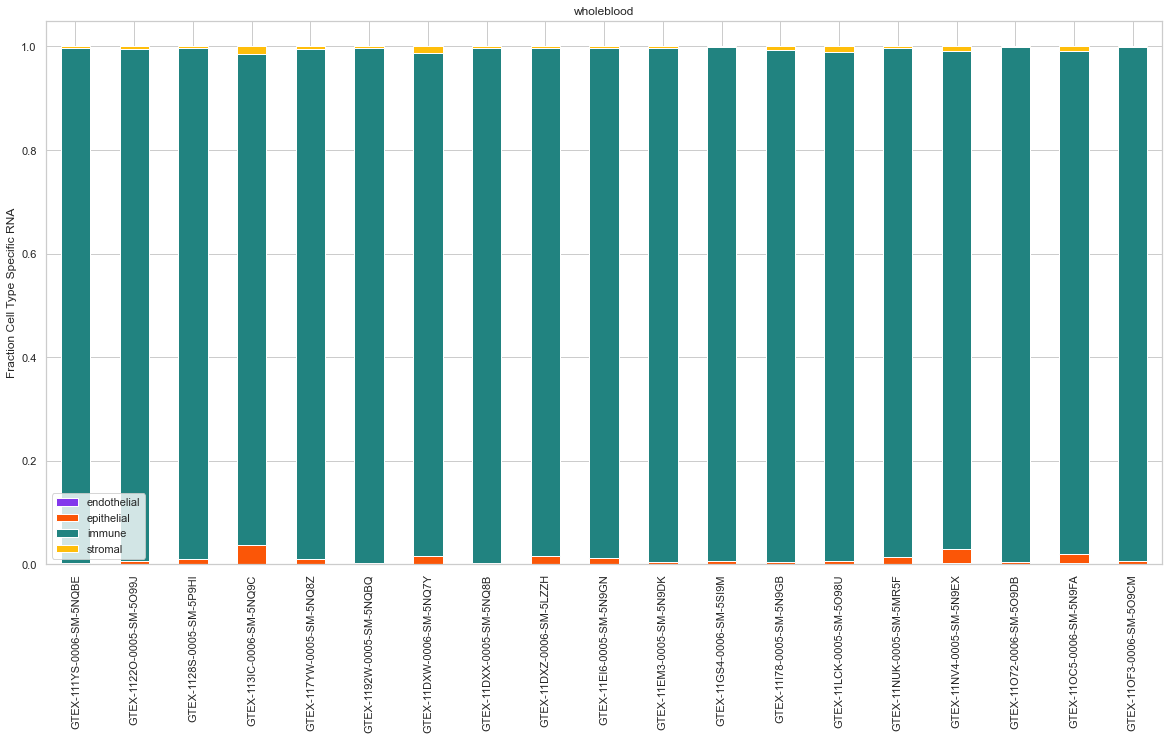

In [36]:
stackBarTiss(wholeblood, "wholeblood")
compartmentFracs(wholeblood, "wholeblood")

top20DF shape  (4, 20)
4


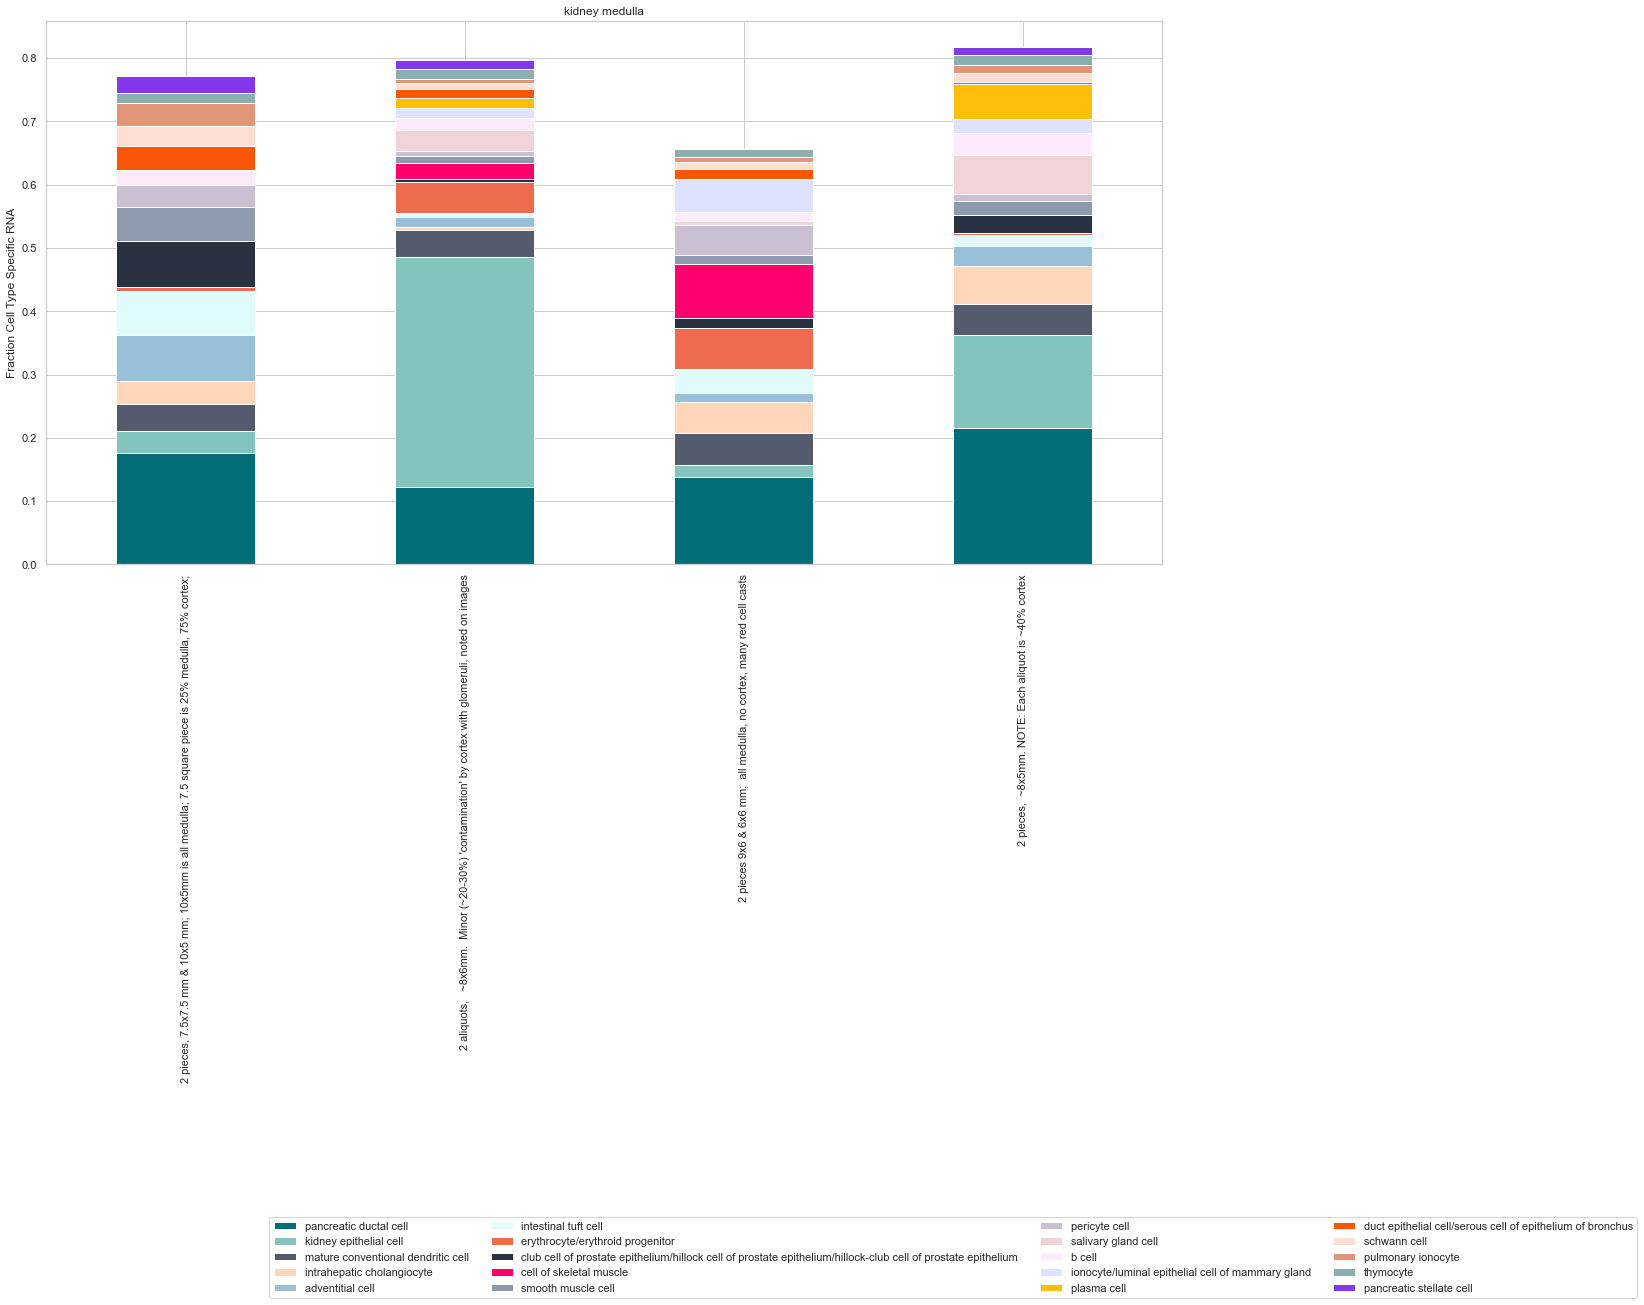

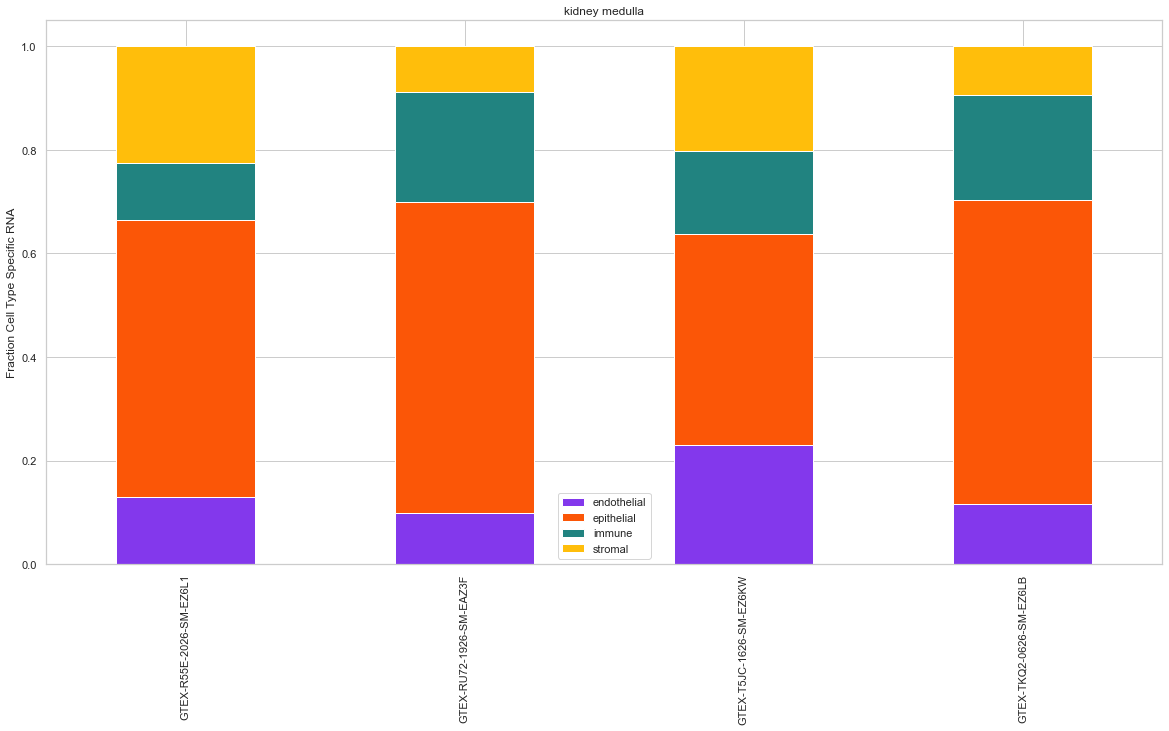

In [37]:
stackBarTiss(kidneyMedulla, "kidney medulla")
compartmentFracs(kidneyMedulla, "kidney medulla")

top20DF shape  (30, 20)
30


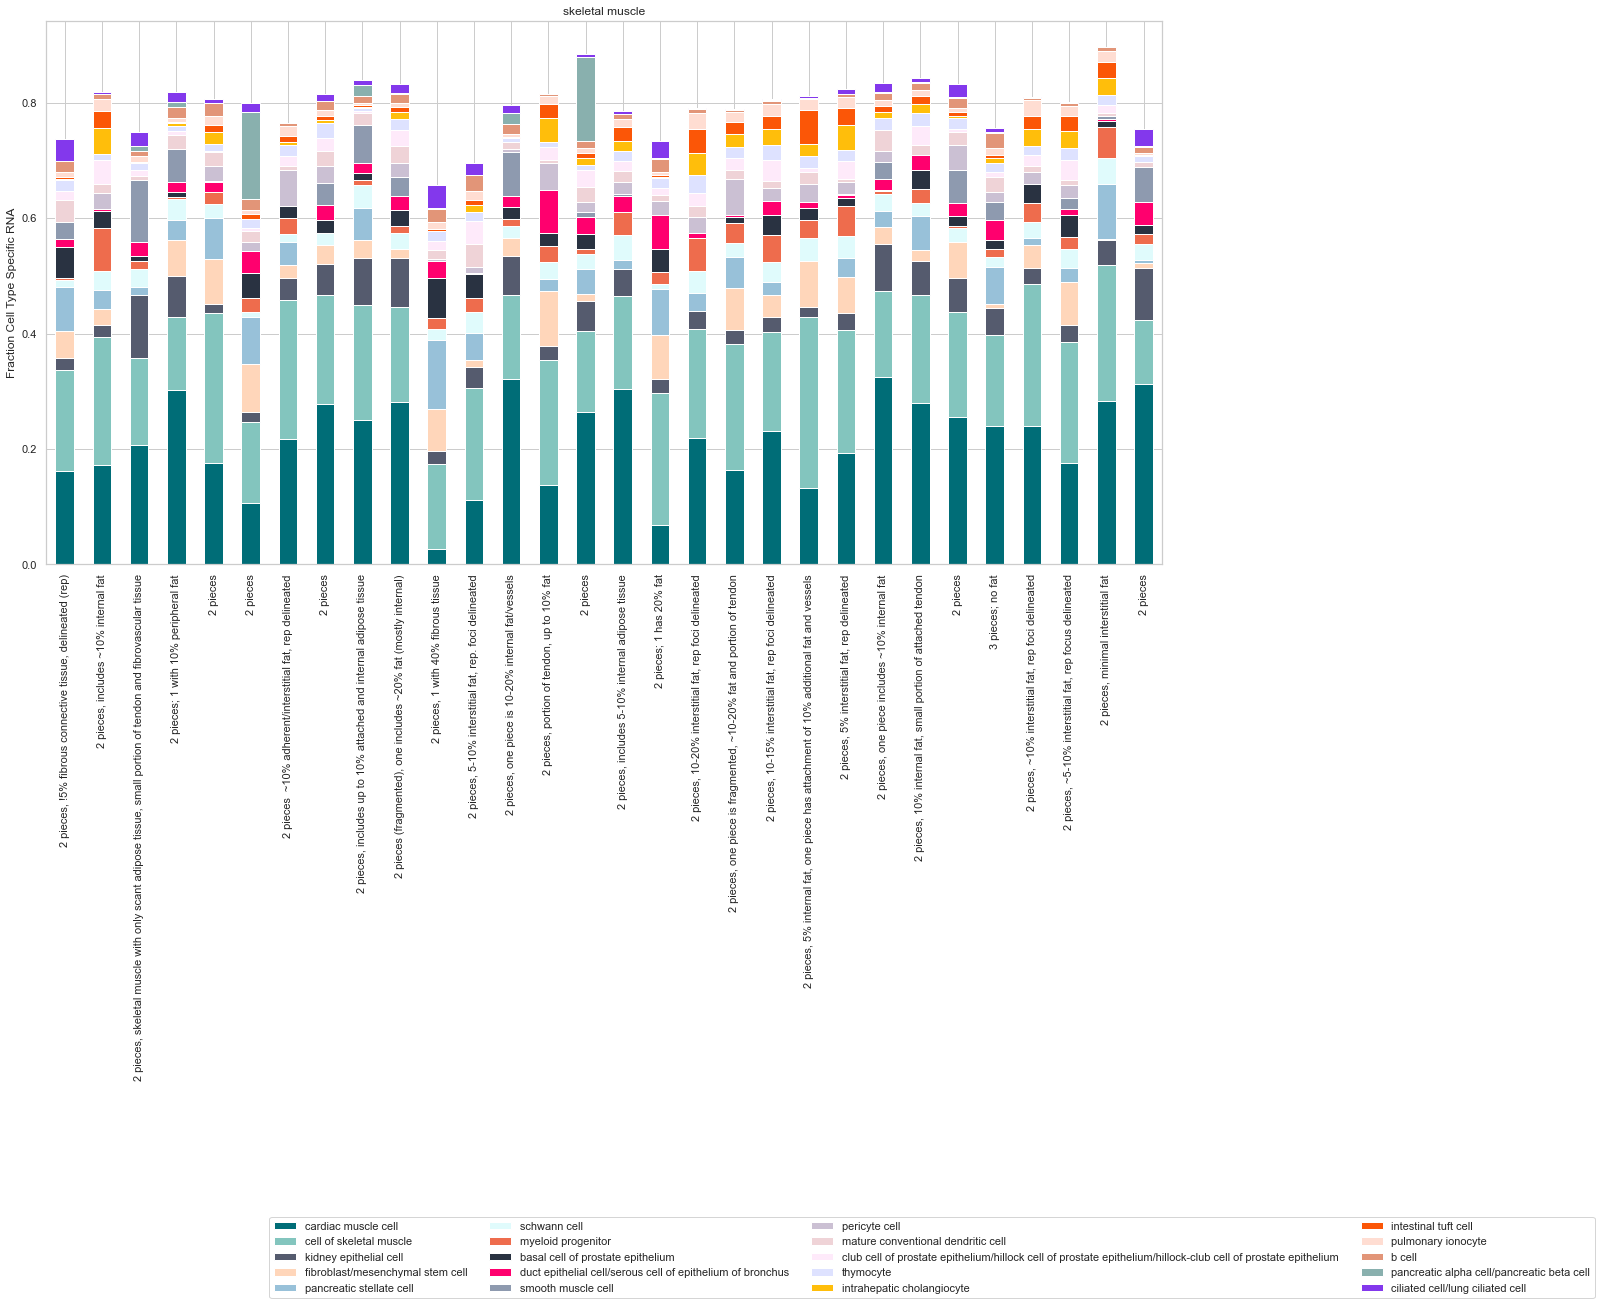

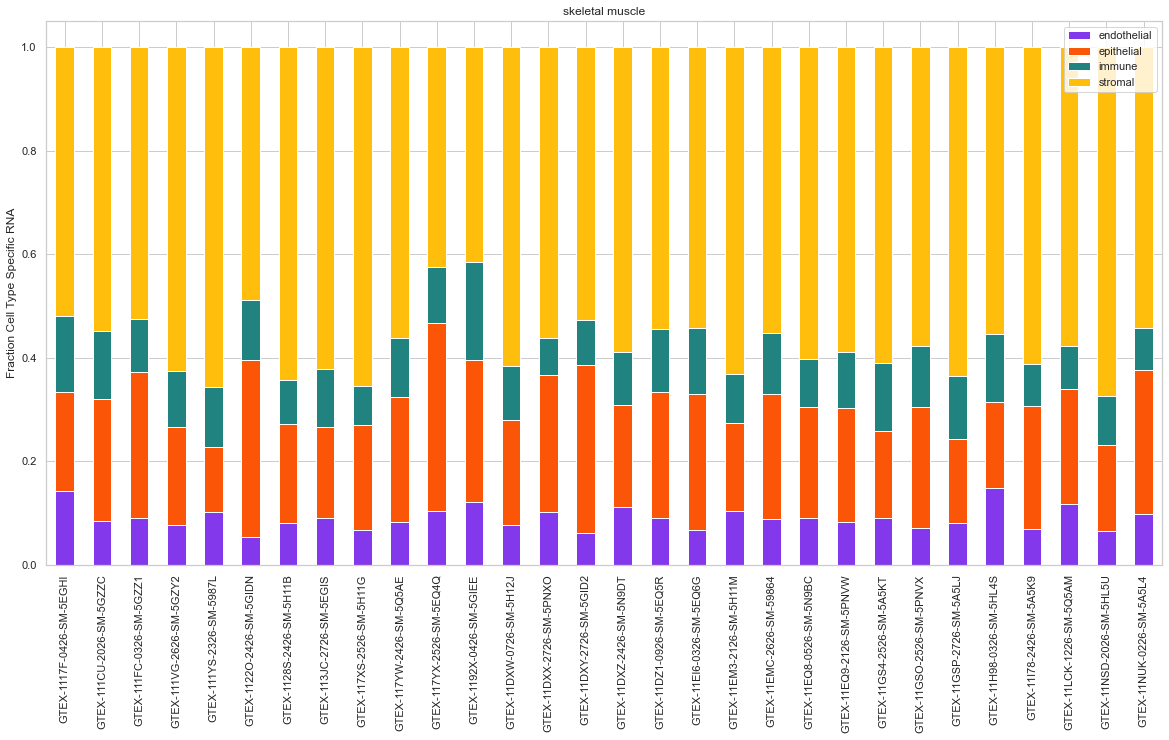

In [38]:
stackBarTiss(muscle, "skeletal muscle")
compartmentFracs(muscle, "skeletal muscle")

top20DF shape  (21, 20)
21


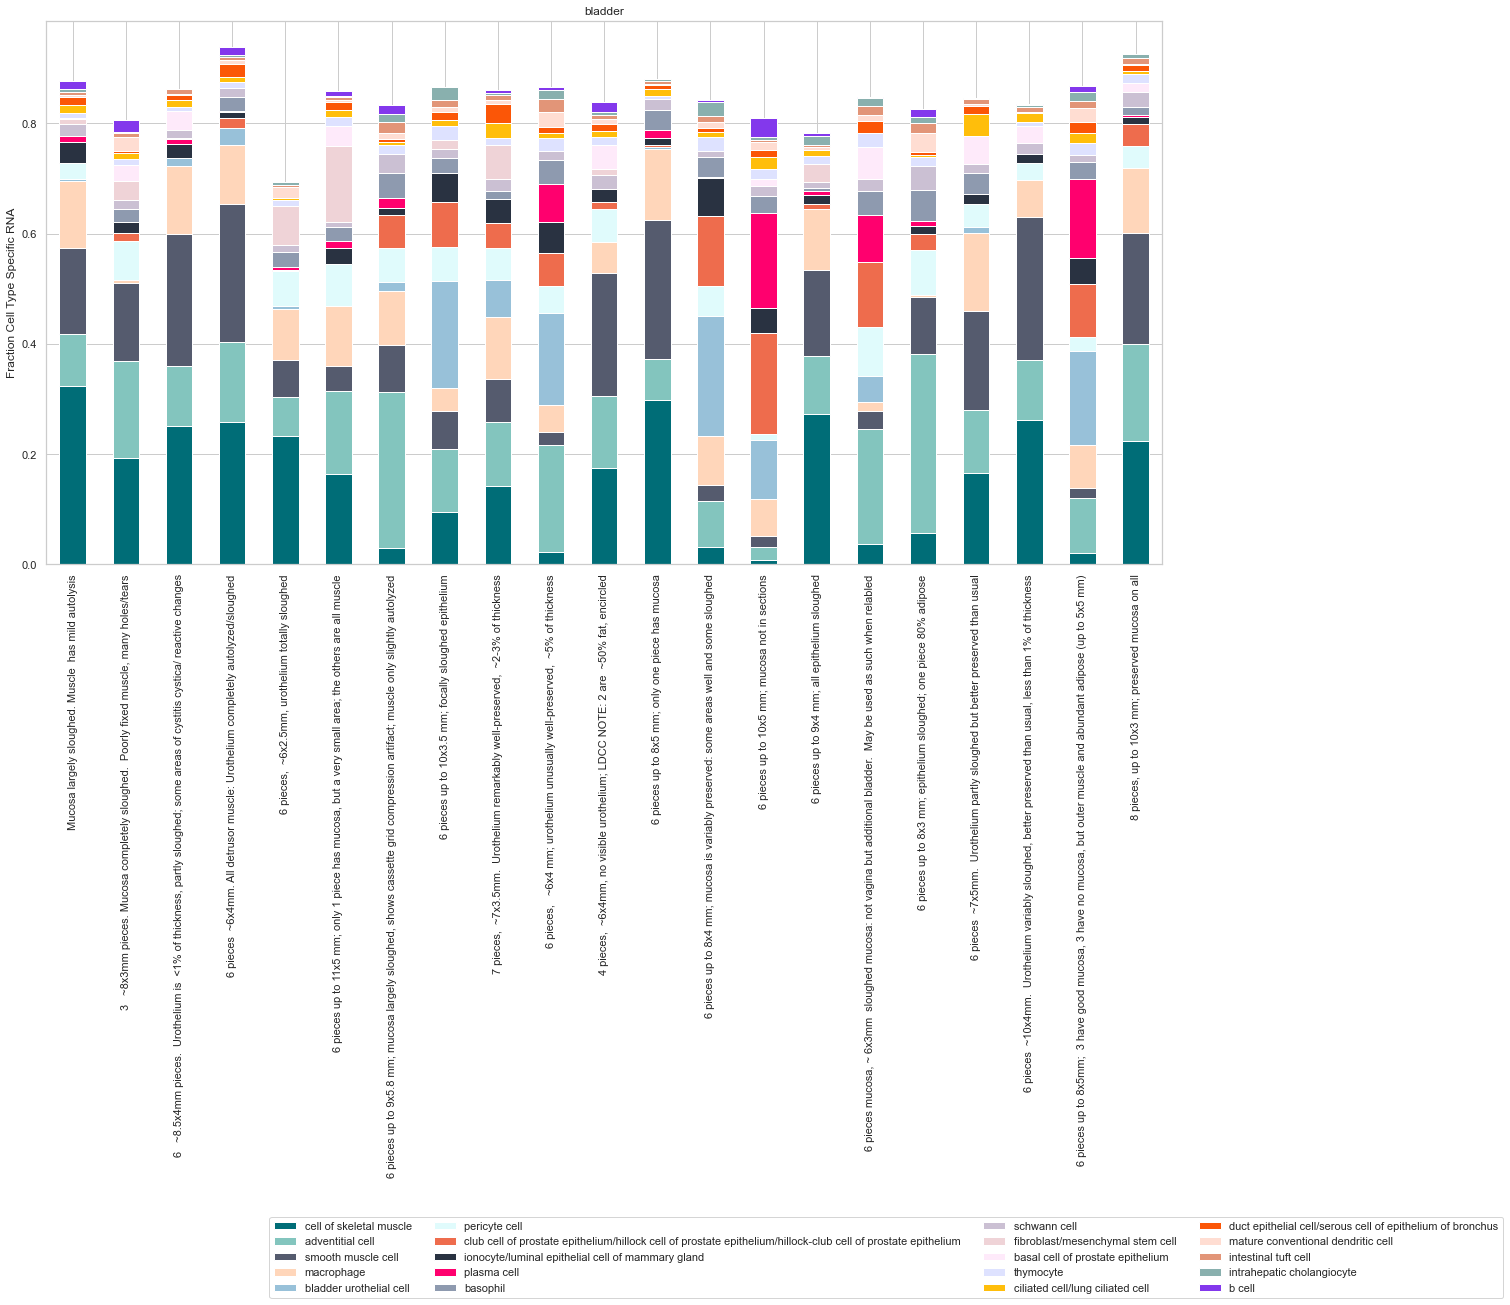

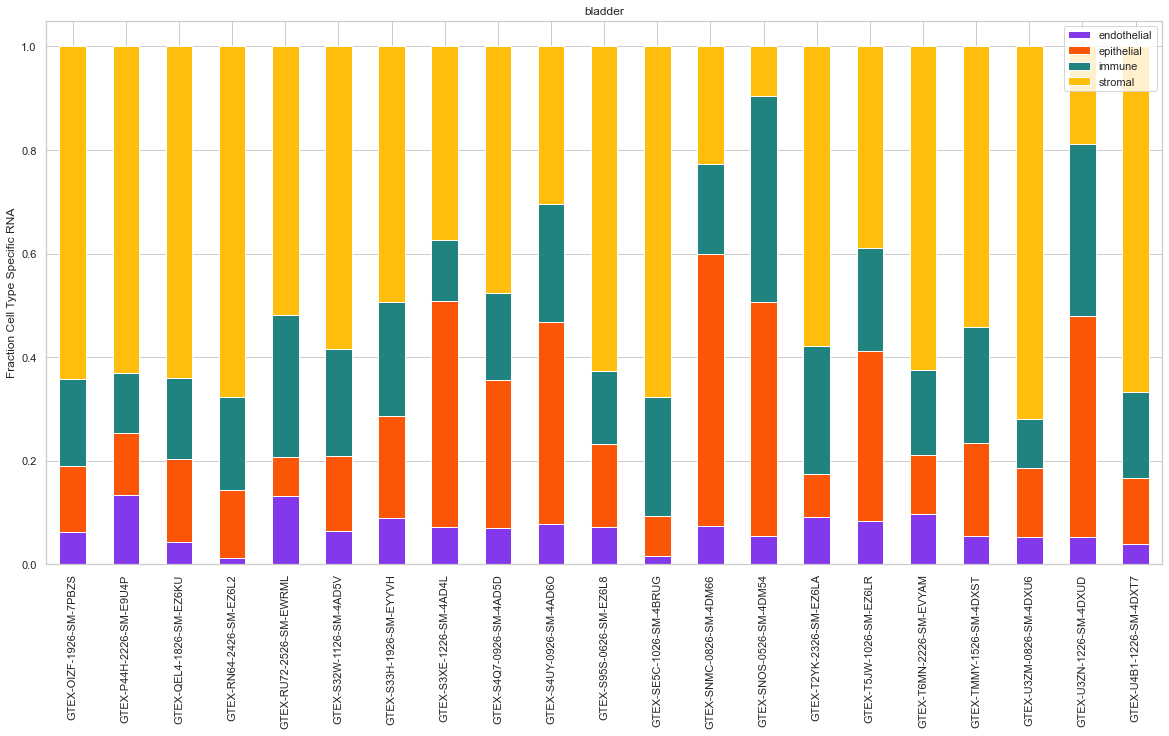

In [39]:
stackBarTiss(bladder, "bladder")
compartmentFracs(bladder, "bladder")

top20DF shape  (30, 20)
30


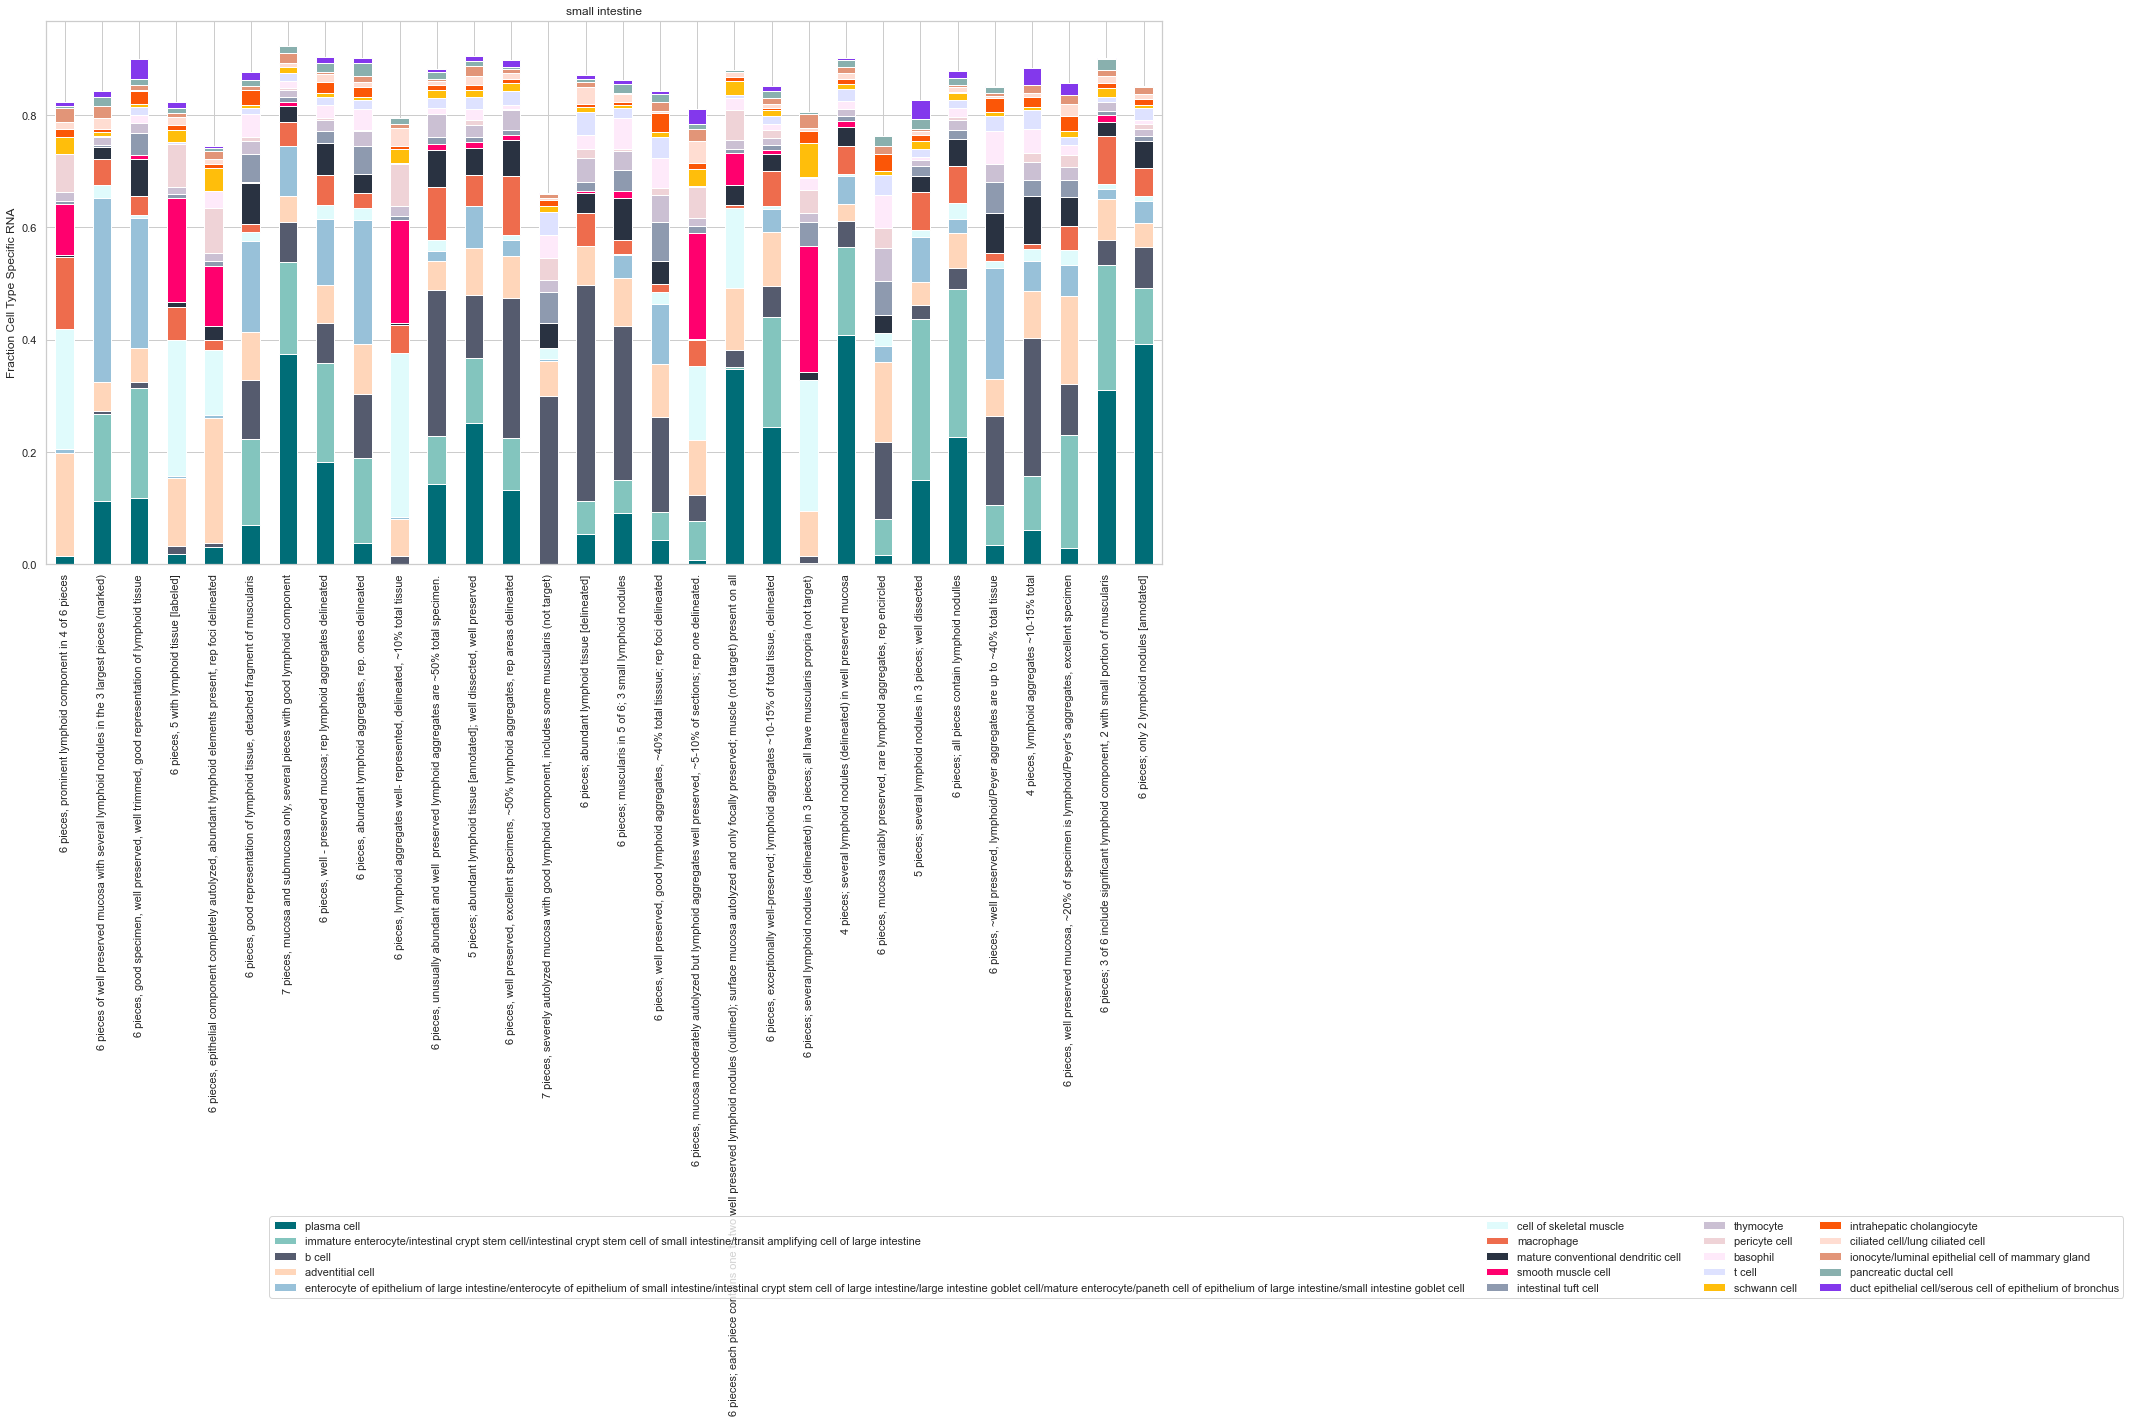

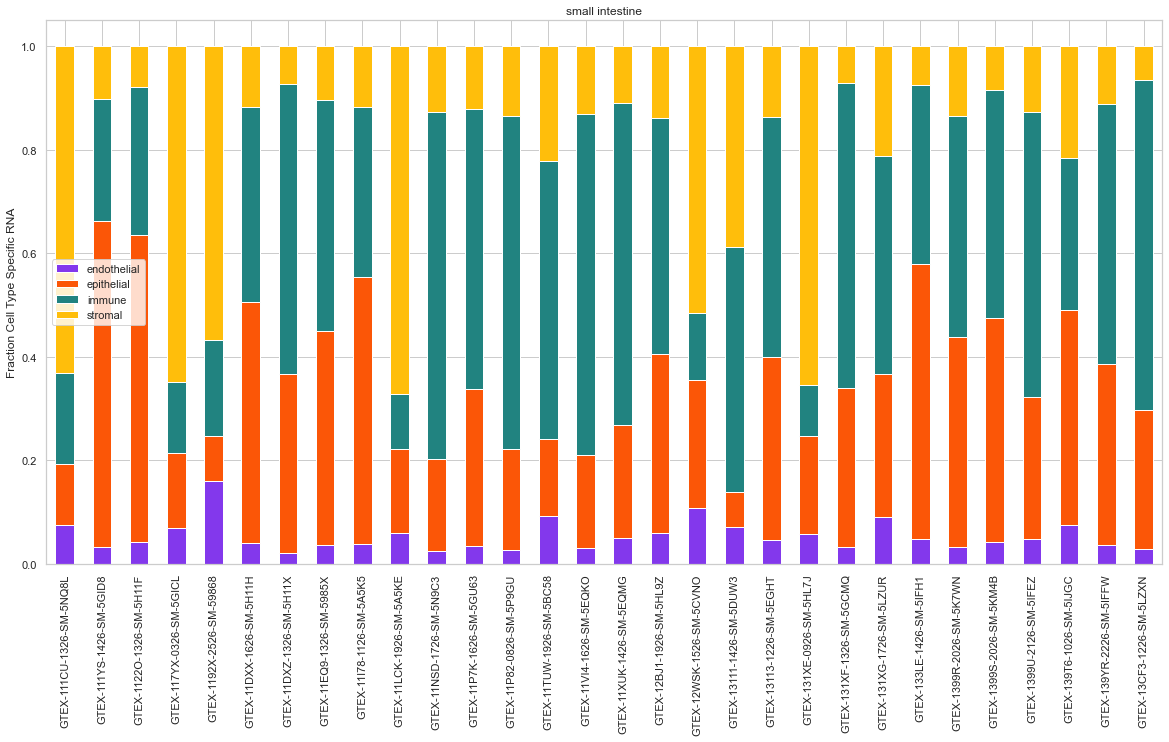

In [40]:
stackBarTiss(smallintestine, "small intestine")
compartmentFracs(smallintestine, "small intestine")

top20DF shape  (30, 20)
30


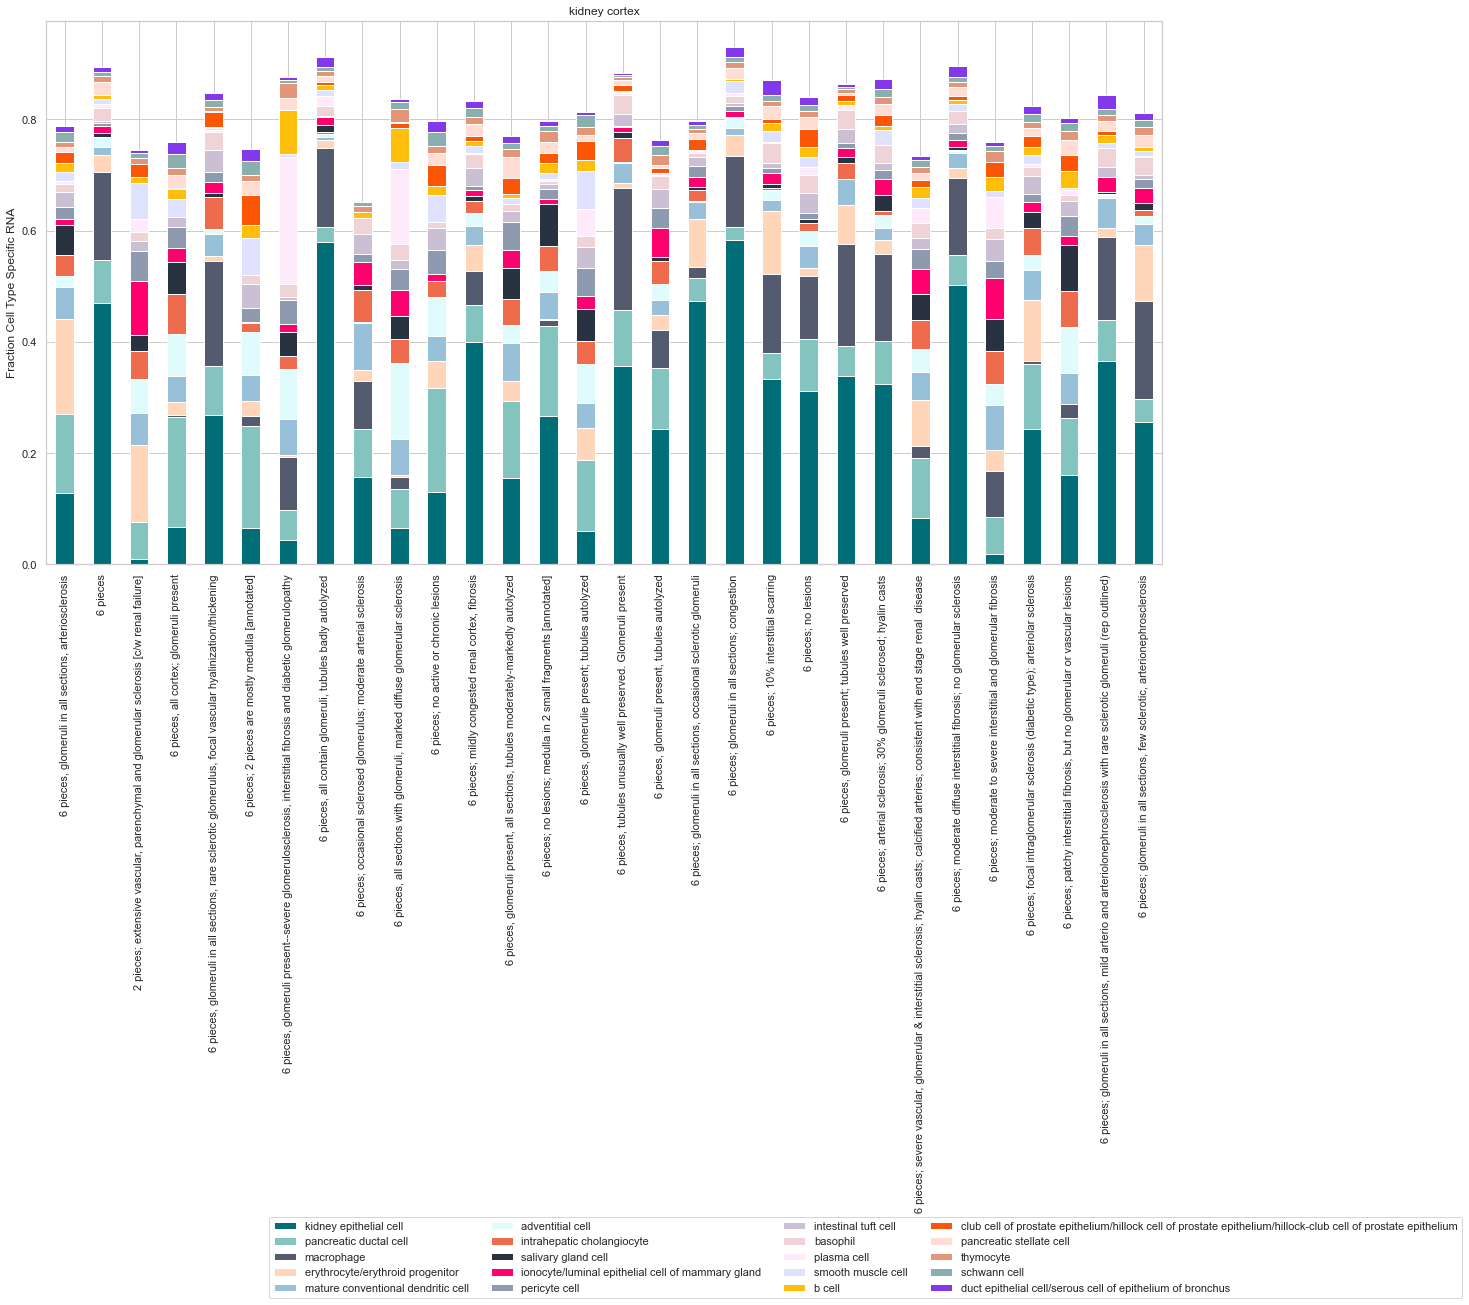

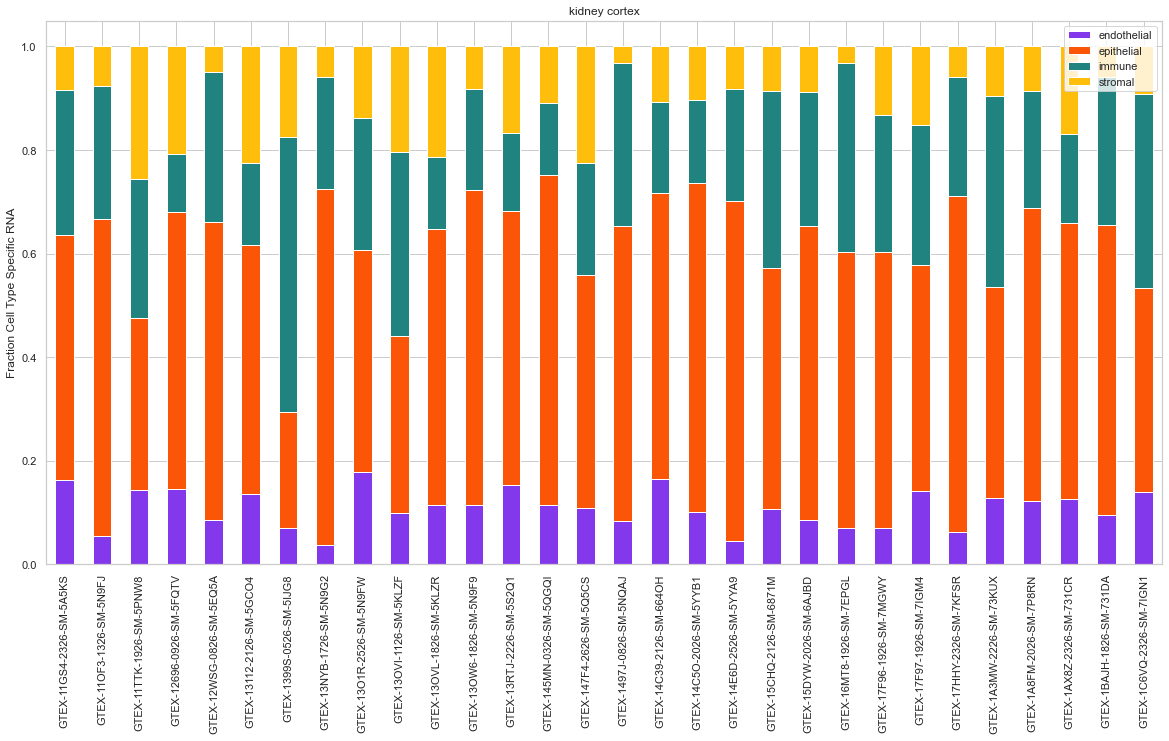

In [41]:
stackBarTiss(kidneyCortex, "kidney cortex")
compartmentFracs(kidneyCortex, "kidney cortex")

In [42]:
bestRMSE['ID'] = [i.split("-NUSVR")[0] for i in bestRMSE.index]
bestRMSE.head()

,rmse,sampleID,ID
GTEX-1117F-0426-SM-5EGHI-NUSVR--nu=0.1-C=10_rmse_normCoef,1.057661,GTEX-1117F-0426-SM-5EGHI-NUSVR--nu=0.1-C=10,GTEX-1117F-0426-SM-5EGHI
GTEX-1117F-2426-SM-5EGGH-NUSVR--nu=0.75-C=10_rmse_normCoef,0.919492,GTEX-1117F-2426-SM-5EGGH-NUSVR--nu=0.75-C=10,GTEX-1117F-2426-SM-5EGGH
GTEX-1117F-2826-SM-5GZXL-NUSVR--nu=0.25-C=1_rmse_normCoef,0.844979,GTEX-1117F-2826-SM-5GZXL-NUSVR--nu=0.25-C=1,GTEX-1117F-2826-SM-5GZXL
GTEX-111CU-0326-SM-5GZXO-NUSVR--nu=0.25-C=10_rmse_normCoef,0.843861,GTEX-111CU-0326-SM-5GZXO-NUSVR--nu=0.25-C=10,GTEX-111CU-0326-SM-5GZXO
GTEX-111CU-0426-SM-5GZY1-NUSVR--nu=0.15-C=0.1_rmse_normCoef,0.774254,GTEX-111CU-0426-SM-5GZY1-NUSVR--nu=0.15-C=0.1,GTEX-111CU-0426-SM-5GZY1


In [43]:
tissID = gtexinfo.loc[bestRMSE['ID'].values.tolist()]["SMTSD"]
print(np.unique(bestRMSE['ID'] == tissID.index.tolist()))
bestRMSE['Tissue'] = tissID.values.tolist()

[ True]


In [44]:
tissSamps = gtexinfo.loc[bestCoefs.index.tolist()]["SMTSD"]

In [45]:
bestCoefs["Tissue"] = tissSamps.values.tolist()

In [46]:
bestCoefs = bestCoefs[~bestCoefs["Tissue"].isin(["Muscle - Skeletal", "Uterus", 'Breast - Mammary Tissue'])]

In [47]:
tissVals = np.unique(bestCoefs["Tissue"]).tolist()

In [48]:
tissVals

['Bladder',
 'Brain - Amygdala',
 'Colon - Transverse',
 'Kidney - Cortex',
 'Kidney - Medulla',
 'Liver',
 'Lung',
 'Small Intestine - Terminal Ileum',
 'Spleen',
 'Whole Blood']

In [49]:
tissCols = ["8ecae6","219ebc","023047","cae9ff", "5fa8d3", "ffb703","fb8500", "EB5160", "A23B72"] + ["4a1942","0075a2"]
           #"8ecae6","219ebc","023047","ffb703","fb8500", "EB5160", "A23B72"]
tissCols = ["#" + i for i in tissCols]

In [50]:
sns.color_palette(tissCols)

[(0.5568627450980392, 0.792156862745098, 0.9019607843137255),
 (0.12941176470588237, 0.6196078431372549, 0.7372549019607844),
 (0.00784313725490196, 0.18823529411764706, 0.2784313725490196),
 (0.792156862745098, 0.9137254901960784, 1.0),
 (0.37254901960784315, 0.6588235294117647, 0.8274509803921568),
 (1.0, 0.7176470588235294, 0.011764705882352941),
 (0.984313725490196, 0.5215686274509804, 0.0),
 (0.9215686274509803, 0.3176470588235294, 0.3764705882352941),
 (0.6352941176470588, 0.23137254901960785, 0.4470588235294118),
 (0.2901960784313726, 0.09803921568627451, 0.25882352941176473),
 (0.0, 0.4588235294117647, 0.6352941176470588)]

In [51]:
len(tissCols)

11

In [52]:
len(tissVals)

10

In [53]:
tissVals

['Bladder',
 'Brain - Amygdala',
 'Colon - Transverse',
 'Kidney - Cortex',
 'Kidney - Medulla',
 'Liver',
 'Lung',
 'Small Intestine - Terminal Ileum',
 'Spleen',
 'Whole Blood']

In [54]:
tiss_pal = {}
for i, tiss in enumerate(tissVals):
    tiss_pal[tiss] = tissCols[i]

# Plot Extended Data Fig 3

In [55]:
bestRMSE.sort_values(by = "Tissue", inplace = True)

In [56]:
bestRMSE = bestRMSE[~bestRMSE["Tissue"].isin(["Muscle - Skeletal", "Uterus", 'Breast - Mammary Tissue'])]

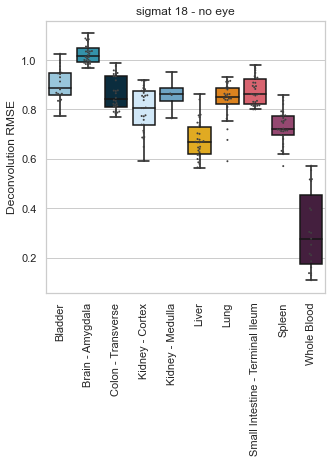

In [57]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = "Tissue", y = "rmse", 
            data = bestRMSE, fliersize = 0, palette = tiss_pal)
sns.swarmplot(x = "Tissue", y = "rmse", 
            data = bestRMSE, color = "0.25", size = 2)
plt.xticks(rotation = "90")
plt.xlabel("")
plt.ylabel("Deconvolution RMSE")
plt.title('sigmat 18 - no eye')
save_figure_pdf(plt, "gtex_RMSE_sigmat7_deconvolution_NOZERO" + figEnd)

In [58]:
# take average and put the top 20 in the excel sheet
df = pd.DataFrame()
fname = "/Users/kayaneh/Documents/deconvolution/aip/cfrna_nbt_submission/extendedData3_sourceData.xlsx"
df.to_excel(fname)
    
with pd.ExcelWriter(fname, mode = 'a') as writer:
    bestRMSE.to_excel(writer, sheet_name = "RMSE", engine = 'xlsxwriter')

In [59]:
pearsonCorrelation = pd.read_csv("gtex_sigMat18.0_cpmThresh1_pearsonR_11222021.csv",
                                 sep = ",", index_col = 0).T
pearsonCorrelation.columns = ['pearsonR']
pearsonCorrelation = pearsonCorrelation.loc[[i for i in pearsonCorrelation.index if 'normCoef' in i]]

In [60]:
bestRMSE_hyperparams = [i.split('_rmse_normCoef')[0] for i in bestRMSE.index]

In [61]:
pearsonCorrelation['hyperparam'] = [i.split("_pearson_normCoef")[0] for i in pearsonCorrelation.index.tolist()]

In [62]:
bestRMSE.shape

(254, 4)

In [63]:
pearsonCorrelation = pearsonCorrelation[pearsonCorrelation['hyperparam'].isin(bestRMSE_hyperparams)]

In [64]:
pearsonCorrelation['ID'] = [i.split('-NUSVR')[0] for i in pearsonCorrelation.index.tolist()]


tissID = gtexinfo.loc[pearsonCorrelation['ID'].values.tolist()]["SMTSD"]
print(np.unique(pearsonCorrelation['ID'] == tissID.index.tolist()))
pearsonCorrelation['Tissue'] = tissID.values.tolist()

[ True]


In [65]:
pearsonCorrelation.head()

,pearsonR,hyperparam,ID,Tissue
GTEX-12WSJ-1526-SM-5GCNI-NUSVR--nu=0.1-C=1_pearson_normCoef,0.542090,GTEX-12WSJ-1526-SM-5GCNI-NUSVR--nu=0.1-C=1,GTEX-12WSJ-1526-SM-5GCNI,Colon - Transverse
GTEX-12KS4-2426-SM-5LU8P-NUSVR--nu=0.05-C=0.1_pearson_normCoef,0.480976,GTEX-12KS4-2426-SM-5LU8P-NUSVR--nu=0.05-C=0.1,GTEX-12KS4-2426-SM-5LU8P,Colon - Transverse
GTEX-12C56-0626-SM-5EGGC-NUSVR--nu=0.1-C=0.1_pearson_normCoef,0.644386,GTEX-12C56-0626-SM-5EGGC-NUSVR--nu=0.1-C=0.1,GTEX-12C56-0626-SM-5EGGC,Colon - Transverse
GTEX-12BJ1-2126-SM-5BC5O-NUSVR--nu=0.5-C=10_pearson_normCoef,0.629487,GTEX-12BJ1-2126-SM-5BC5O-NUSVR--nu=0.5-C=10,GTEX-12BJ1-2126-SM-5BC5O,Colon - Transverse
GTEX-1211K-1726-SM-5FQUJ-NUSVR--nu=0.05-C=0.1_pearson_normCoef,0.579514,GTEX-1211K-1726-SM-5FQUJ-NUSVR--nu=0.05-C=0.1,GTEX-1211K-1726-SM-5FQUJ,Colon - Transverse


In [66]:
tiss, cts = np.unique(pearsonCorrelation["Tissue"], return_counts = True)

In [67]:
with pd.ExcelWriter(fname, mode = 'a') as writer:
    pearsonCorrelation.to_excel(writer, sheet_name = "pearson_correlation", engine = 'xlsxwriter')

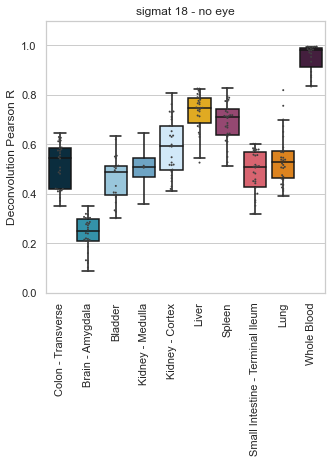

In [68]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = "Tissue", y = "pearsonR", 
            data = pearsonCorrelation, palette = tiss_pal, fliersize = 0)
sns.swarmplot(x = "Tissue", y = "pearsonR", 
            data = pearsonCorrelation, color = "0.25", size = 2)
plt.xticks(rotation = "90")
plt.xlabel("")
plt.ylabel("Deconvolution Pearson R")
plt.ylim(0, 1.1)
plt.title('sigmat 18 - no eye')
save_figure_pdf(plt, "gtex_pearsonR_sigmat7_deconvolution_NOZERO_" + figEnd)

In [69]:
with pd.ExcelWriter(fname, mode = 'a') as writer:
    pearsonCorrelation.to_excel(writer, sheet_name = "pearson r", engine = 'xlsxwriter')

In [70]:
# take average and put the top 20 in the excel sheet
df = pd.DataFrame()
df.to_excel("gtex_deconv_12012021.xlsx")

for tiss in np.unique(bestCoefs["Tissue"]):
    sheetname = tiss
    
    thisTiss = bestCoefs[bestCoefs["Tissue"] == tiss]
    

    # eliminate 'Tissue', 'r', 'rmse', 'p-val' columns when computing the top 20 mean fractional
    # contributions of cell type specific RNA
    top20Cells = thisTiss.iloc[:, :-4].mean(axis = 0).sort_values(ascending = False).head(20).index.tolist()

    
    with pd.ExcelWriter("gtex_deconv_12012021.xlsx", mode = 'a') as writer:
        thisTiss.to_excel(writer, sheet_name = tiss, engine = 'xlsxwriter')

/Users/kayaneh/anaconda3/lib/python3.6/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [71]:
clear all

In [72]:
os.getcwd()

'/Users/kayaneh/Documents/deconvolution/revision1/08012021_perComp_noEye_sigmat_18/gtex_v18_rmseAll_11282021'